### BADASS Analysis - can we tell the difference between: (i) hydrophobic, polar and charged amino acids; (ii)glycine, proline,  aliphatic hydrophobic, aromatic, polar, charged amino acids; and (ii) glutamate, arginine, serine, valine and tryptophan?

In [1]:
from subroutines.parse_array_data import ParseArrayData
from subroutines.train import RunML

In [2]:
import copy
import random
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
from collections import OrderedDict
from IPython.display import display
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import (
    accuracy_score, recall_score, precision_score, f1_score, cohen_kappa_score
)
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import LinearSVC, SVC
%matplotlib inline
plt.rcParams['figure.figsize'] = (10, 10)  # Sets default figure size

#### Parse in input data

Amino acid data

In [3]:
aa_fluor_data = ParseArrayData(
    dir_path='/Users/ks17361/Lab_work_Dek_Woolfson/BADASS/array_sensing/Small_Molecules/AAs/Reformatted_AA_csvs/',
    repeat_names=['repeat_1', 'repeat_2', 'repeat_3', 'repeat_4', 'repeat_5', 'repeat_6', 'repeat_7', 'repeat_8',
                  'repeat_9', 'repeat_10', 'repeat_11', 'repeat_12', 'repeat_13', 'repeat_14', 'repeat_15',
                  'repeat_16', 'repeat_17', 'repeat_18', 'repeat_19', 'repeat_20'],
    peptide_list=['No Pep', 'GRP22', 'GRP35', 'GRP46', 'GRP51', 'GRP52', 'GRP63', 'GRP80', 'Pent', 'Hex',
                  'Hex2', 'Hept', '24D', '24E', '24K', '17K'],
    results_dir='Analysis/Standard_array/AAs/',
    control_peptides=['GRP35'],
    control_analytes=[]
)

Directory Analysis/Standard_array/AAs/ already found in /Users/ks17361/Lab_work_Dek_Woolfson/BADASS/array_sensing
Overwrite Analysis/Standard_array/AAs/?y


Locate xlsx files

In [4]:
aa_fluor_data.group_xlsx_repeats()

Read the data in each xlsx file into a dataframe and perform min-max scaling

In [5]:
aa_fluor_data.xlsx_to_scaled_df('No Pep')

Parsing plate /Users/ks17361/Lab_work_Dek_Woolfson/BADASS/array_sensing/Small_Molecules/AAs/Reformatted_AA_csvs/S_T_V_W_Y_repeat_1.xlsx
Parsing plate /Users/ks17361/Lab_work_Dek_Woolfson/BADASS/array_sensing/Small_Molecules/AAs/Reformatted_AA_csvs/A_C_D_N_R_repeat_1.xlsx
Parsing plate /Users/ks17361/Lab_work_Dek_Woolfson/BADASS/array_sensing/Small_Molecules/AAs/Reformatted_AA_csvs/F_K_L_M_P_repeat_1.xlsx
Parsing plate /Users/ks17361/Lab_work_Dek_Woolfson/BADASS/array_sensing/Small_Molecules/AAs/Reformatted_AA_csvs/E_G_H_I_Q_repeat_1.xlsx
Parsing plate /Users/ks17361/Lab_work_Dek_Woolfson/BADASS/array_sensing/Small_Molecules/AAs/Reformatted_AA_csvs/E_G_H_I_Q_repeat_2.xlsx
Parsing plate /Users/ks17361/Lab_work_Dek_Woolfson/BADASS/array_sensing/Small_Molecules/AAs/Reformatted_AA_csvs/F_K_L_M_P_repeat_2.xlsx
Parsing plate /Users/ks17361/Lab_work_Dek_Woolfson/BADASS/array_sensing/Small_Molecules/AAs/Reformatted_AA_csvs/A_C_D_N_R_repeat_2.xlsx
Parsing plate /Users/ks17361/Lab_work_Dek_Woolfs

Parsing plate /Users/ks17361/Lab_work_Dek_Woolfson/BADASS/array_sensing/Small_Molecules/AAs/Reformatted_AA_csvs/F_K_L_M_P_repeat_16.xlsx
Parsing plate /Users/ks17361/Lab_work_Dek_Woolfson/BADASS/array_sensing/Small_Molecules/AAs/Reformatted_AA_csvs/A_C_D_N_R_repeat_16.xlsx
Parsing plate /Users/ks17361/Lab_work_Dek_Woolfson/BADASS/array_sensing/Small_Molecules/AAs/Reformatted_AA_csvs/E_G_H_I_Q_repeat_16.xlsx
Parsing plate /Users/ks17361/Lab_work_Dek_Woolfson/BADASS/array_sensing/Small_Molecules/AAs/Reformatted_AA_csvs/S_T_V_W_Y_repeat_17.xlsx
Parsing plate /Users/ks17361/Lab_work_Dek_Woolfson/BADASS/array_sensing/Small_Molecules/AAs/Reformatted_AA_csvs/F_K_L_M_P_repeat_17.xlsx
Parsing plate /Users/ks17361/Lab_work_Dek_Woolfson/BADASS/array_sensing/Small_Molecules/AAs/Reformatted_AA_csvs/E_G_H_I_Q_repeat_17.xlsx
Parsing plate /Users/ks17361/Lab_work_Dek_Woolfson/BADASS/array_sensing/Small_Molecules/AAs/Reformatted_AA_csvs/A_C_D_N_R_repeat_17.xlsx
Parsing plate /Users/ks17361/Lab_work_Dek

Combines readings of the same analyte solution across different plates, then calculates the median reading for non-independent repeats of the same analyte 

In [6]:
aa_fluor_data.combine_plate_readings(outlier_excl_thresh=0.001, drop_thresh=1)

 Outlier excluded from final output dataset: I, 5 (flagged readings = GRP80: 0.1600685400569306) 
 Outlier excluded from final output dataset: F, 17 (flagged readings = GRP51: 0.2419179858957572, GRP63: 0.5789450940723286, 24D: 0.33927430522240076, 24K: 0.6719971491870447) 
 Outlier excluded from final output dataset: F, 4 (flagged readings = Hept: 0.11100362531858676) 
 Outlier excluded from final output dataset: P, 17 (flagged readings = GRP51: 0.3022399142056189, GRP52: 0.13447008190604748, GRP63: 0.5640250781964347, 24D: 0.36329025433905426, 24K: 0.5486513196593159) 
 Outlier excluded from final output dataset: C, 7 (flagged readings = GRP46: 0.3436248476506214, Hex: 0.30356507987690307) 
 Outlier excluded from final output dataset: Y, 2 (flagged readings = GRP52: 0.18604365383593835) 
 Outlier excluded from final output dataset: K, 1 (flagged readings = GRP52: 0.29757286450610754) 
 Outlier excluded from final output dataset: K, 17 (flagged readings = GRP63: 0.5951184502146847) 
 

In [7]:
aa_fluor_data.ml_fluor_data

,GRP22,GRP46,GRP51,GRP52,GRP63,GRP80,Pent,Hex,Hex2,Hept,24D,24E,24K,17K,Analyte
0,1.026873,1.007399,0.971713,1.023925,0.978247,0.950832,1.068836,1.082512,0.988705,1.018088,0.921291,0.937010,0.917118,0.875742,V
1,1.059491,0.908701,0.999664,0.999005,0.960113,0.938631,0.942980,1.005445,1.006676,0.983191,0.970722,0.949546,0.971013,1.101920,V
2,0.965141,0.974713,1.014850,0.986786,0.982784,0.957846,0.997804,0.932036,0.889121,0.951756,0.968383,0.954337,1.070978,0.987070,V
3,1.166764,0.919433,0.996604,0.991701,0.952791,0.984199,0.946955,0.962080,1.012261,0.981314,0.970808,0.975897,1.007249,0.907924,V
4,0.961407,0.934625,0.965781,0.976128,0.946819,0.965683,0.924643,0.935709,0.913318,0.947464,0.959456,0.940890,0.997088,1.029870,V
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
382,0.948058,0.925875,0.994389,0.981372,1.004560,0.917957,0.973259,0.969006,0.989828,0.972176,0.930997,0.945500,1.014177,0.982937,D
383,1.003152,0.916720,0.996871,1.014911,0.945782,0.874955,0.983953,0.971969,1.006505,0.998794,0.916241,0.967331,0.982149,0.903455,D
384,0.932914,1.157952,0.986907,0.977399,0.943722,1.029465,0.904229,0.966471,0.841995,0.890570,0.893067,0.966736,1.030653,0.804178,D
385,1.019052,0.899922,0.962441,0.950144,0.961479,0.899977,1.005697,0.961865,1.039182,0.966363,0.909312,0.923746,0.925981,1.009830,D


Makes dataframes of merged amino acid classes (hydrophobic / polar / charged, and glycine / proline / aliphatic hydrophobic / aromatic / polar / charged), since there is insufficient data to learn to distinguish the 20 different amino acids tested

In [8]:
class_3_fluor_data = copy.deepcopy(aa_fluor_data.ml_fluor_data)
label_conv_dict = {'A': 'Hydrophobic',
                   'R': 'Charged',
                   'N': 'Polar',
                   'D': 'Charged',
                   'C': 'Polar',
                   'Q': 'Polar',
                   'E': 'Charged',
                   'G': 'Polar',
                   'H': 'Charged',
                   'I': 'Hydrophobic',
                   'L': 'Hydrophobic',
                   'K': 'Charged',
                   'M': 'Hydrophobic',
                   'F': 'Hydrophobic',
                   'P': 'Hydrophobic',
                   'S': 'Polar',
                   'T': 'Polar',
                   'W': 'Hydrophobic',
                   'Y': 'Polar',
                   'V': 'Hydrophobic'}
analyte_list = [label_conv_dict[class_3_fluor_data['Analyte'].tolist()[n]]
                for n in range(class_3_fluor_data.shape[0])]
class_3_fluor_data['Analyte'] = analyte_list

In [9]:
class_3_fluor_data

,GRP22,GRP46,GRP51,GRP52,GRP63,GRP80,Pent,Hex,Hex2,Hept,24D,24E,24K,17K,Analyte
0,1.026873,1.007399,0.971713,1.023925,0.978247,0.950832,1.068836,1.082512,0.988705,1.018088,0.921291,0.937010,0.917118,0.875742,Hydrophobic
1,1.059491,0.908701,0.999664,0.999005,0.960113,0.938631,0.942980,1.005445,1.006676,0.983191,0.970722,0.949546,0.971013,1.101920,Hydrophobic
2,0.965141,0.974713,1.014850,0.986786,0.982784,0.957846,0.997804,0.932036,0.889121,0.951756,0.968383,0.954337,1.070978,0.987070,Hydrophobic
3,1.166764,0.919433,0.996604,0.991701,0.952791,0.984199,0.946955,0.962080,1.012261,0.981314,0.970808,0.975897,1.007249,0.907924,Hydrophobic
4,0.961407,0.934625,0.965781,0.976128,0.946819,0.965683,0.924643,0.935709,0.913318,0.947464,0.959456,0.940890,0.997088,1.029870,Hydrophobic
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
382,0.948058,0.925875,0.994389,0.981372,1.004560,0.917957,0.973259,0.969006,0.989828,0.972176,0.930997,0.945500,1.014177,0.982937,Charged
383,1.003152,0.916720,0.996871,1.014911,0.945782,0.874955,0.983953,0.971969,1.006505,0.998794,0.916241,0.967331,0.982149,0.903455,Charged
384,0.932914,1.157952,0.986907,0.977399,0.943722,1.029465,0.904229,0.966471,0.841995,0.890570,0.893067,0.966736,1.030653,0.804178,Charged
385,1.019052,0.899922,0.962441,0.950144,0.961479,0.899977,1.005697,0.961865,1.039182,0.966363,0.909312,0.923746,0.925981,1.009830,Charged


In [10]:
class_6_fluor_data = copy.deepcopy(aa_fluor_data.ml_fluor_data)
label_conv_dict = {'A': 'Aliphatic hydrophobic',
                   'R': 'Charged',
                   'N': 'Polar',
                   'D': 'Charged',
                   'C': 'Polar',
                   'Q': 'Polar',
                   'E': 'Charged',
                   'G': 'Glycine',
                   'H': 'Charged',
                   'I': 'Aliphatic hydrophobic',
                   'L': 'Aliphatic hydrophobic',
                   'K': 'Charged',
                   'M': 'Aliphatic hydrophobic',
                   'F': 'Aromatic',
                   'P': 'Proline',
                   'S': 'Polar',
                   'T': 'Polar',
                   'W': 'Aromatic',
                   'Y': 'Aromatic',
                   'V': 'Aliphatic hydrophobic'}
analyte_list = [label_conv_dict[class_6_fluor_data['Analyte'].tolist()[n]]
                for n in range(class_6_fluor_data.shape[0])]
class_6_fluor_data['Analyte'] = analyte_list

In [11]:
class_6_fluor_data

,GRP22,GRP46,GRP51,GRP52,GRP63,GRP80,Pent,Hex,Hex2,Hept,24D,24E,24K,17K,Analyte
0,1.026873,1.007399,0.971713,1.023925,0.978247,0.950832,1.068836,1.082512,0.988705,1.018088,0.921291,0.937010,0.917118,0.875742,Aliphatic hydrophobic
1,1.059491,0.908701,0.999664,0.999005,0.960113,0.938631,0.942980,1.005445,1.006676,0.983191,0.970722,0.949546,0.971013,1.101920,Aliphatic hydrophobic
2,0.965141,0.974713,1.014850,0.986786,0.982784,0.957846,0.997804,0.932036,0.889121,0.951756,0.968383,0.954337,1.070978,0.987070,Aliphatic hydrophobic
3,1.166764,0.919433,0.996604,0.991701,0.952791,0.984199,0.946955,0.962080,1.012261,0.981314,0.970808,0.975897,1.007249,0.907924,Aliphatic hydrophobic
4,0.961407,0.934625,0.965781,0.976128,0.946819,0.965683,0.924643,0.935709,0.913318,0.947464,0.959456,0.940890,0.997088,1.029870,Aliphatic hydrophobic
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
382,0.948058,0.925875,0.994389,0.981372,1.004560,0.917957,0.973259,0.969006,0.989828,0.972176,0.930997,0.945500,1.014177,0.982937,Charged
383,1.003152,0.916720,0.996871,1.014911,0.945782,0.874955,0.983953,0.971969,1.006505,0.998794,0.916241,0.967331,0.982149,0.903455,Charged
384,0.932914,1.157952,0.986907,0.977399,0.943722,1.029465,0.904229,0.966471,0.841995,0.890570,0.893067,0.966736,1.030653,0.804178,Charged
385,1.019052,0.899922,0.962441,0.950144,0.961479,0.899977,1.005697,0.961865,1.039182,0.966363,0.909312,0.923746,0.925981,1.009830,Charged


Makes sub-dataframe of 5 analytes we are interested in distinguishing (too few data points to attempt to distinguish all 20 different amino acids tested on the standard array)

In [12]:
sub_indices = [i for i in range(aa_fluor_data.ml_fluor_data.shape[0])
               if aa_fluor_data.ml_fluor_data['Analyte'][i] in ['E', 'R', 'S', 'V', 'W']]
sub_aa_fluor_data = copy.deepcopy(aa_fluor_data.ml_fluor_data).iloc[sub_indices].reset_index(drop=True)

In [13]:
sub_aa_fluor_data

,GRP22,GRP46,GRP51,GRP52,GRP63,GRP80,Pent,Hex,Hex2,Hept,24D,24E,24K,17K,Analyte
0,1.026873,1.007399,0.971713,1.023925,0.978247,0.950832,1.068836,1.082512,0.988705,1.018088,0.921291,0.937010,0.917118,0.875742,V
1,1.059491,0.908701,0.999664,0.999005,0.960113,0.938631,0.942980,1.005445,1.006676,0.983191,0.970722,0.949546,0.971013,1.101920,V
2,0.965141,0.974713,1.014850,0.986786,0.982784,0.957846,0.997804,0.932036,0.889121,0.951756,0.968383,0.954337,1.070978,0.987070,V
3,1.166764,0.919433,0.996604,0.991701,0.952791,0.984199,0.946955,0.962080,1.012261,0.981314,0.970808,0.975897,1.007249,0.907924,V
4,0.961407,0.934625,0.965781,0.976128,0.946819,0.965683,0.924643,0.935709,0.913318,0.947464,0.959456,0.940890,0.997088,1.029870,V
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
95,0.583421,1.501716,0.866743,0.959357,0.936332,1.105159,0.920604,0.291837,0.613224,0.538772,0.835592,1.026435,0.801839,1.633919,R
96,0.645732,1.481882,0.897851,0.982674,0.924394,1.060492,0.923913,0.382189,0.701882,0.646554,0.836815,1.005052,0.911791,1.560976,R
97,0.848338,1.135445,0.979896,1.021800,0.956529,0.992299,0.982498,0.602765,0.729014,0.888072,0.984580,0.973055,0.897716,1.213920,R
98,0.954148,1.450942,0.990743,1.015363,0.980930,1.023047,0.942391,0.486986,0.682245,0.836446,1.012307,1.013022,0.869525,1.306684,R


Generates "representative" fingerprint for each class (by calculating the median value for each feature)

Hydrophobic / polar / charged

Hydrophobic


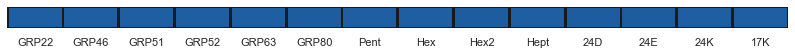

Polar


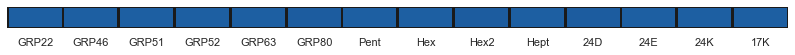

Charged


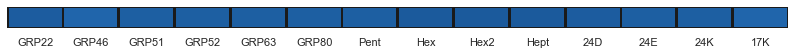

In [14]:
classes = []
for class_name in class_3_fluor_data['Analyte'].tolist():
    if not class_name in classes:
        classes.append(class_name)
class_3_fluor_data_x_val = class_3_fluor_data.drop(['Analyte'], axis=1)
vmin = class_3_fluor_data_x_val.values.min()
vmax = class_3_fluor_data_x_val.values.max()

for class_name in classes:
    print(class_name)
    class_indices = [n for n in range(class_3_fluor_data.shape[0])
                     if class_3_fluor_data['Analyte'][n] == class_name]
    repr_array = np.median(class_3_fluor_data_x_val.values[class_indices, :], axis=0)

    sns.set(rc={'figure.figsize':(14,0.4)})
    plt.clf()
    sns.heatmap(
        np.array([repr_array]), vmin=vmin, vmax=vmax, annot=False, cmap='RdBu_r', cbar=False,
        xticklabels=class_3_fluor_data_x_val.columns, yticklabels=False, linecolor='k', linewidths=2
    )
    plt.show()

Aliphatic hydrophobic / aromatic / polar / charged / glycine / proline

Aliphatic hydrophobic


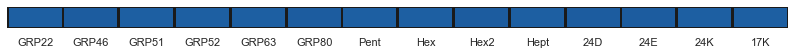

Aromatic


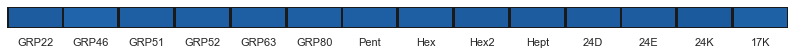

Glycine


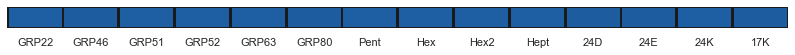

Polar


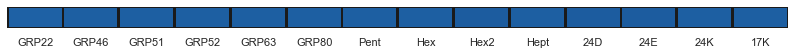

Proline


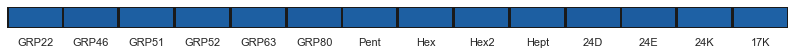

Charged


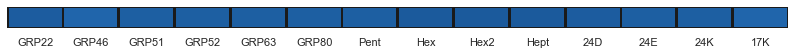

In [15]:
classes = []
for class_name in class_6_fluor_data['Analyte'].tolist():
    if not class_name in classes:
        classes.append(class_name)
class_6_fluor_data_x_val = class_6_fluor_data.drop(['Analyte'], axis=1)
vmin = class_6_fluor_data_x_val.values.min()
vmax = class_6_fluor_data_x_val.values.max()

for class_name in classes:
    print(class_name)
    class_indices = [n for n in range(class_6_fluor_data.shape[0])
                     if class_6_fluor_data['Analyte'][n] == class_name]
    repr_array = np.median(class_6_fluor_data_x_val.values[class_indices, :], axis=0)

    sns.set(rc={'figure.figsize':(14,0.4)})
    plt.clf()
    sns.heatmap(
        np.array([repr_array]), vmin=vmin, vmax=vmax, annot=False, cmap='RdBu_r', cbar=False,
        xticklabels=class_6_fluor_data_x_val.columns, yticklabels=False, linecolor='k', linewidths=2
    )
    plt.show()

E / R / S / V / W

V


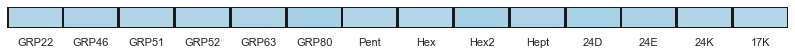

S


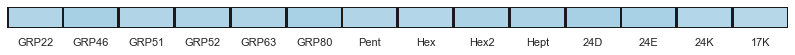

W


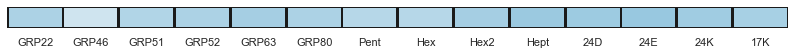

E


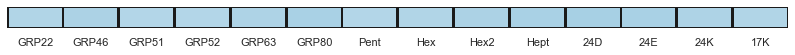

R


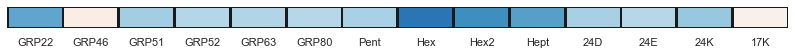

In [16]:
classes = []
for class_name in sub_aa_fluor_data['Analyte'].tolist():
    if not class_name in classes:
        classes.append(class_name)
sub_aa_fluor_data_x_val = sub_aa_fluor_data.drop(['Analyte'], axis=1)
vmin = sub_aa_fluor_data_x_val.values.min()
vmax = sub_aa_fluor_data_x_val.values.max()

for class_name in classes:
    print(class_name)
    class_indices = [n for n in range(sub_aa_fluor_data.shape[0])
                     if sub_aa_fluor_data['Analyte'][n] == class_name]
    repr_array = np.median(sub_aa_fluor_data_x_val.values[class_indices, :], axis=0)

    sns.set(rc={'figure.figsize':(14,0.4)})
    plt.clf()
    sns.heatmap(
        np.array([repr_array]), vmin=vmin, vmax=vmax, annot=False, cmap='RdBu_r', cbar=False,
        xticklabels=sub_aa_fluor_data_x_val.columns, yticklabels=False, linecolor='k', linewidths=2
    )
    plt.show()

Generates box plots to compare the distribution of values for each class across the 14 features

Charged


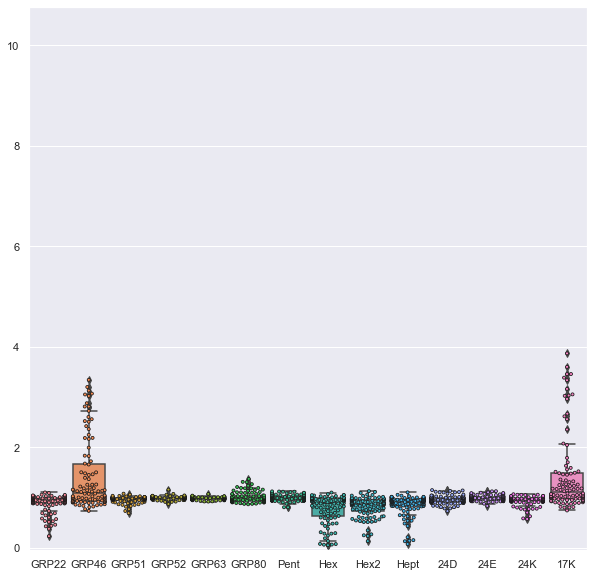

Polar


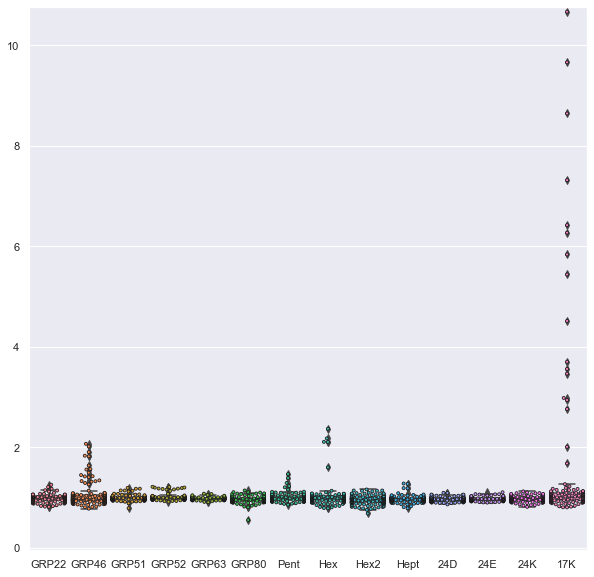

Hydrophobic


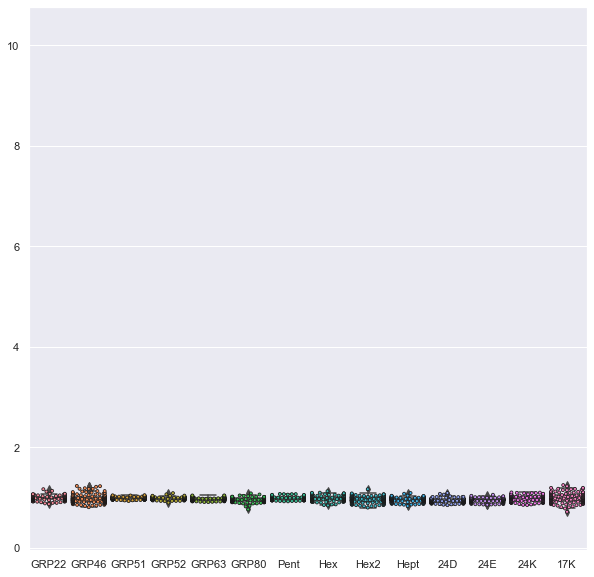

In [17]:
ymin = class_3_fluor_data.drop('Analyte', axis=1).min().min() - 0.1
ymax = class_3_fluor_data.drop('Analyte', axis=1).max().max() + 0.1

charged_indices = [int(i) for i in range(class_3_fluor_data.shape[0])
                   if class_3_fluor_data['Analyte'][i] == 'Charged']
polar_indices = [int(i) for i in range(class_3_fluor_data.shape[0])
                 if class_3_fluor_data['Analyte'][i] == 'Polar']
hydrophobic_indices = [int(i) for i in range(class_3_fluor_data.shape[0])
                       if class_3_fluor_data['Analyte'][i] == 'Hydrophobic']

sns.set(rc={'figure.figsize':(10,10)})
print('Charged')
plt.clf()
plt.ylim(ymin, ymax)
sns.boxplot(data=class_3_fluor_data.iloc[charged_indices])
sns.swarmplot(data=class_3_fluor_data.iloc[charged_indices], size=3, edgecolor='k', linewidth=0.8)
plt.show()

print('Polar')
plt.clf()
plt.ylim(ymin, ymax)
sns.boxplot(data=class_3_fluor_data.iloc[polar_indices])
sns.swarmplot(data=class_3_fluor_data.iloc[polar_indices], size=3, edgecolor='k', linewidth=0.8)
plt.show()

print('Hydrophobic')
plt.clf()
plt.ylim(ymin, ymax)
sns.boxplot(data=class_3_fluor_data.iloc[hydrophobic_indices])
sns.swarmplot(data=class_3_fluor_data.iloc[hydrophobic_indices], size=3, edgecolor='k', linewidth=0.8)
plt.show()

Charged


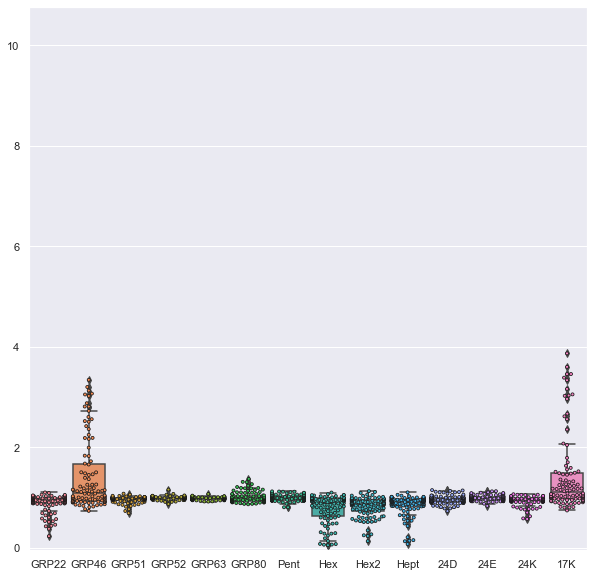

Polar


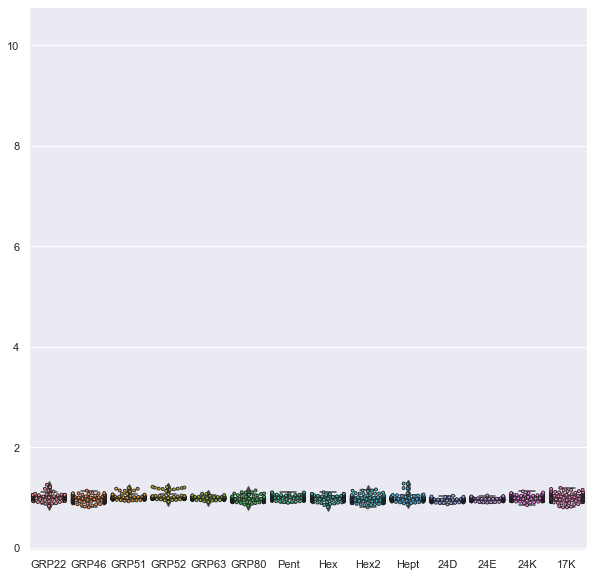

Aliphatic Hydrophobic


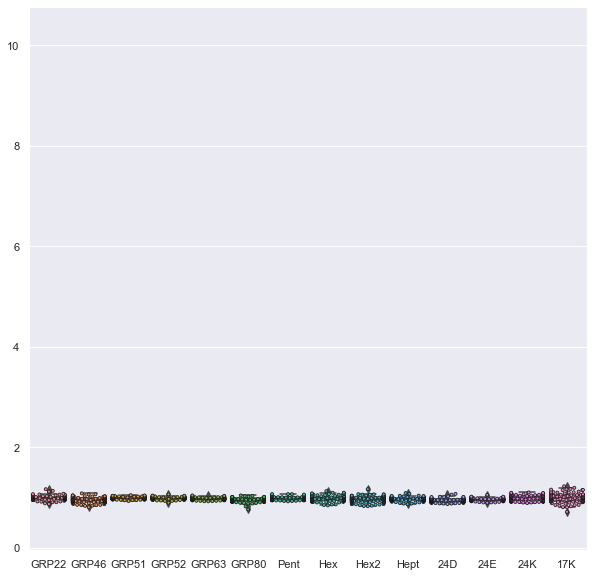

Aromatic


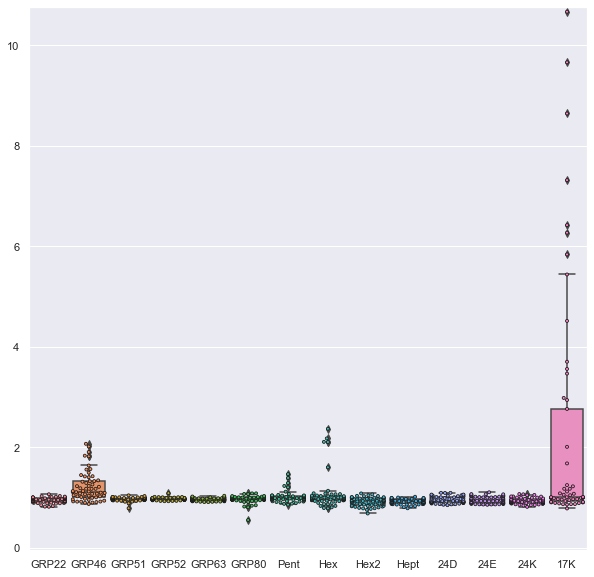

Glycine


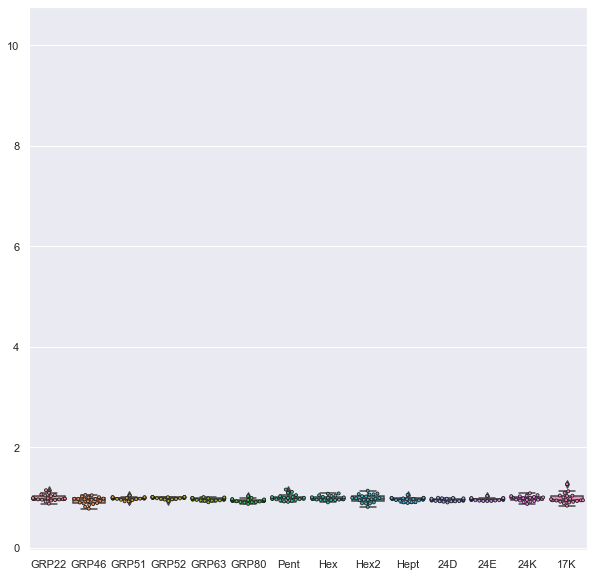

Proline


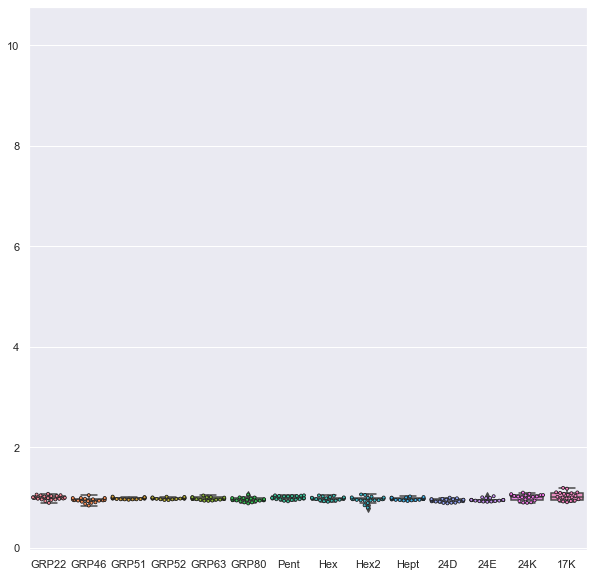

In [18]:
ymin = class_6_fluor_data.drop('Analyte', axis=1).min().min() - 0.1
ymax = class_6_fluor_data.drop('Analyte', axis=1).max().max() + 0.1

charged_indices = [int(i) for i in range(class_6_fluor_data.shape[0])
                   if class_6_fluor_data['Analyte'][i] == 'Charged']
polar_indices = [int(i) for i in range(class_6_fluor_data.shape[0])
                 if class_6_fluor_data['Analyte'][i] == 'Polar']
hydrophobic_indices = [int(i) for i in range(class_6_fluor_data.shape[0])
                       if class_6_fluor_data['Analyte'][i] == 'Aliphatic hydrophobic']
aromatic_indices = [int(i) for i in range(class_6_fluor_data.shape[0])
                    if class_6_fluor_data['Analyte'][i] == 'Aromatic']
glycine_indices = [int(i) for i in range(class_6_fluor_data.shape[0])
                   if class_6_fluor_data['Analyte'][i] == 'Glycine']
proline_indices = [int(i) for i in range(class_6_fluor_data.shape[0])
                   if class_6_fluor_data['Analyte'][i] == 'Proline']

sns.set(rc={'figure.figsize':(10,10)})
print('Charged')
plt.clf()
plt.ylim(ymin, ymax)
sns.boxplot(data=class_6_fluor_data.iloc[charged_indices])
sns.swarmplot(data=class_6_fluor_data.iloc[charged_indices], size=3, edgecolor='k', linewidth=0.8)
plt.show()

print('Polar')
plt.clf()
plt.ylim(ymin, ymax)
sns.boxplot(data=class_6_fluor_data.iloc[polar_indices])
sns.swarmplot(data=class_6_fluor_data.iloc[polar_indices], size=3, edgecolor='k', linewidth=0.8)
plt.show()

print('Aliphatic Hydrophobic')
plt.clf()
plt.ylim(ymin, ymax)
sns.boxplot(data=class_6_fluor_data.iloc[hydrophobic_indices])
sns.swarmplot(data=class_6_fluor_data.iloc[hydrophobic_indices], size=3, edgecolor='k', linewidth=0.8)
plt.show()

print('Aromatic')
plt.clf()
plt.ylim(ymin, ymax)
sns.boxplot(data=class_6_fluor_data.iloc[aromatic_indices])
sns.swarmplot(data=class_6_fluor_data.iloc[aromatic_indices], size=3, edgecolor='k', linewidth=0.8)
plt.show()

print('Glycine')
plt.clf()
plt.ylim(ymin, ymax)
sns.boxplot(data=class_6_fluor_data.iloc[glycine_indices])
sns.swarmplot(data=class_6_fluor_data.iloc[glycine_indices], size=3, edgecolor='k', linewidth=0.8)
plt.show()

print('Proline')
plt.clf()
plt.ylim(ymin, ymax)
sns.boxplot(data=class_6_fluor_data.iloc[proline_indices])
sns.swarmplot(data=class_6_fluor_data.iloc[proline_indices], size=3, edgecolor='k', linewidth=0.8)
plt.show()

Glutamate


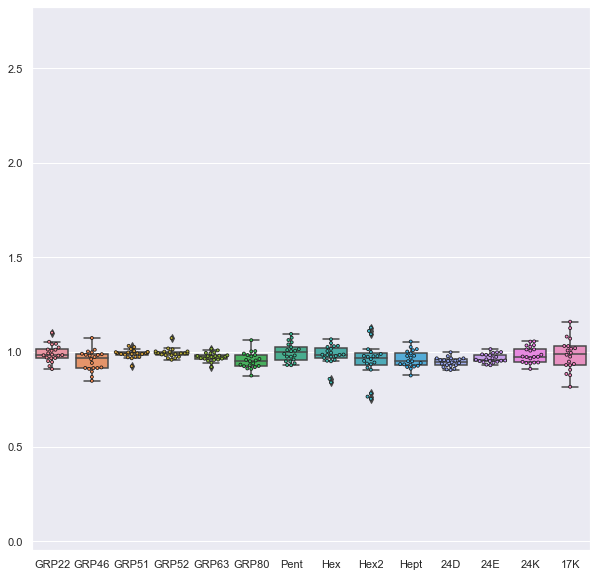

Arginine


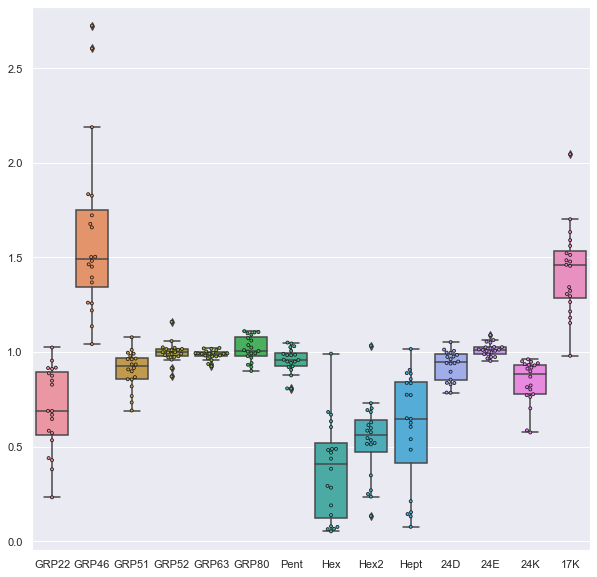

Serine


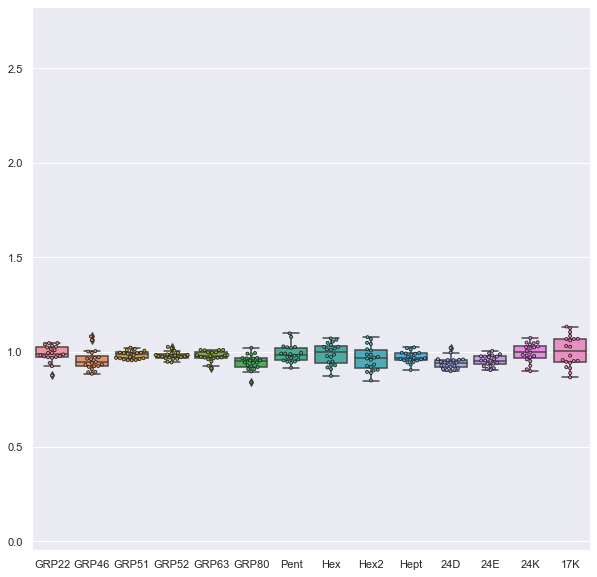

Tryptophan


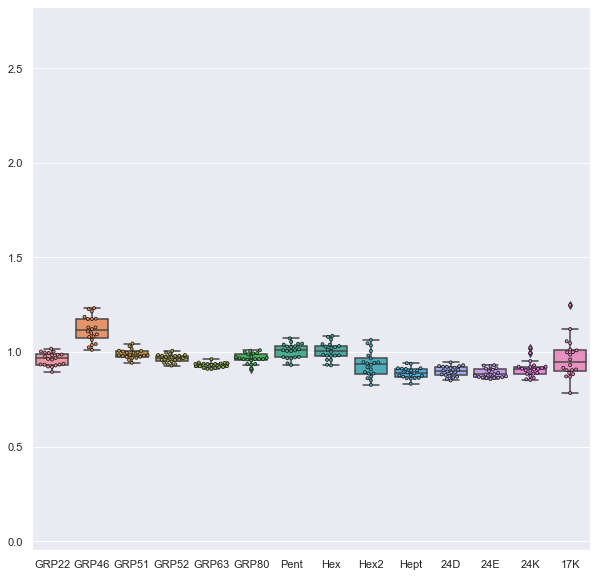

Valine


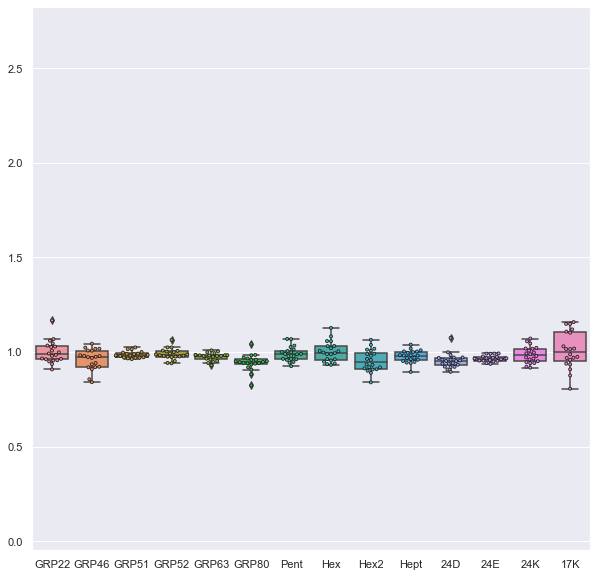

In [19]:
ymin = sub_aa_fluor_data.drop('Analyte', axis=1).min().min() - 0.1
ymax = sub_aa_fluor_data.drop('Analyte', axis=1).max().max() + 0.1

e_indices = [int(i) for i in range(sub_aa_fluor_data.shape[0])
             if sub_aa_fluor_data['Analyte'][i] == 'E']
r_indices = [int(i) for i in range(sub_aa_fluor_data.shape[0])
             if sub_aa_fluor_data['Analyte'][i] == 'R']
s_indices = [int(i) for i in range(sub_aa_fluor_data.shape[0])
             if sub_aa_fluor_data['Analyte'][i] == 'S']
w_indices = [int(i) for i in range(sub_aa_fluor_data.shape[0])
             if sub_aa_fluor_data['Analyte'][i] == 'W']
v_indices = [int(i) for i in range(sub_aa_fluor_data.shape[0])
             if sub_aa_fluor_data['Analyte'][i] == 'V']

sns.set(rc={'figure.figsize':(10,10)})
print('Glutamate')
plt.clf()
plt.ylim(ymin, ymax)
sns.boxplot(data=sub_aa_fluor_data.iloc[e_indices])
sns.swarmplot(data=sub_aa_fluor_data.iloc[e_indices], size=3, edgecolor='k', linewidth=0.8)
plt.show()

print('Arginine')
plt.clf()
plt.ylim(ymin, ymax)
sns.boxplot(data=sub_aa_fluor_data.iloc[r_indices])
sns.swarmplot(data=sub_aa_fluor_data.iloc[r_indices], size=3, edgecolor='k', linewidth=0.8)
plt.show()

print('Serine')
plt.clf()
plt.ylim(ymin, ymax)
sns.boxplot(data=sub_aa_fluor_data.iloc[s_indices])
sns.swarmplot(data=sub_aa_fluor_data.iloc[s_indices], size=3, edgecolor='k', linewidth=0.8)
plt.show()

print('Tryptophan')
plt.clf()
plt.ylim(ymin, ymax)
sns.boxplot(data=sub_aa_fluor_data.iloc[w_indices])
sns.swarmplot(data=sub_aa_fluor_data.iloc[w_indices], size=3, edgecolor='k', linewidth=0.8)
plt.show()

print('Valine')
plt.clf()
plt.ylim(ymin, ymax)
sns.boxplot(data=sub_aa_fluor_data.iloc[v_indices])
sns.swarmplot(data=sub_aa_fluor_data.iloc[v_indices], size=3, edgecolor='k', linewidth=0.8)
plt.show()

#### Run machine learning

In [20]:
plt.rcParams['figure.figsize'] = (10, 10)  # Sets default figure size

Hydrophobic / polar / charged

First split the data into a training and test set

In [21]:
ml = RunML(
    results_dir='/Users/ks17361/Lab_work_Dek_Woolfson/BADASS/array_sensing/Analysis/Standard_array/AAs/'
                'AAs_3classes_ML_results/', fluor_data=class_3_fluor_data
)

In [22]:
ml.split_train_test_data(randomise=True, percent_test=0.2, test_analytes=[])

On all of the data (training and test sets):

- Visualise correlation between the initial 14 features

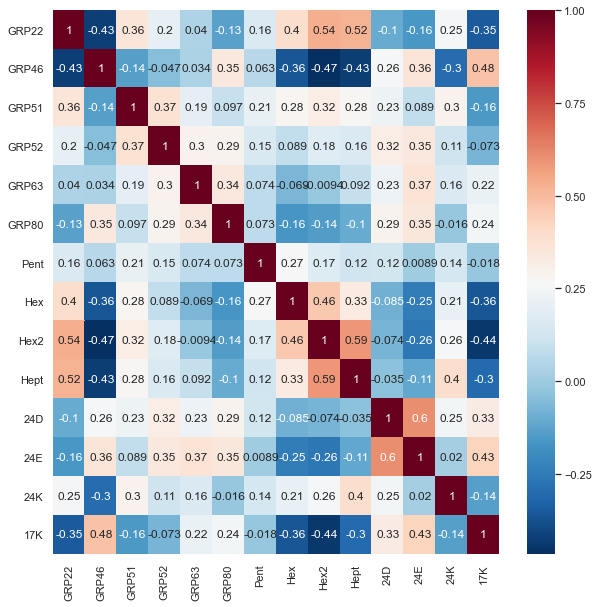

,GRP22,GRP46,GRP51,GRP52,GRP63,GRP80,Pent,Hex,Hex2,Hept,24D,24E,24K,17K
GRP22,1.000000,-0.425044,0.362439,0.203470,0.040403,-0.129330,0.157303,0.398384,0.535123,0.520701,-0.101082,-0.158010,0.251888,-0.347647
GRP46,-0.425044,1.000000,-0.138275,-0.047147,0.034393,0.345555,0.063199,-0.359307,-0.466569,-0.431790,0.257870,0.361024,-0.295011,0.484043
GRP51,0.362439,-0.138275,1.000000,0.372602,0.192904,0.096521,0.213405,0.282505,0.318981,0.275279,0.227482,0.089038,0.298412,-0.156252
GRP52,0.203470,-0.047147,0.372602,1.000000,0.295366,0.294552,0.147904,0.088988,0.180199,0.156171,0.323462,0.345960,0.112531,-0.072853
GRP63,0.040403,0.034393,0.192904,0.295366,1.000000,0.344876,0.074364,-0.068885,-0.009434,0.092046,0.225347,0.365477,0.156583,0.219597
GRP80,-0.129330,0.345555,0.096521,0.294552,0.344876,1.000000,0.073039,-0.163892,-0.143442,-0.104745,0.290555,0.347874,-0.015501,0.244685
Pent,0.157303,0.063199,0.213405,0.147904,0.074364,0.073039,1.000000,0.268759,0.165437,0.120523,0.123618,0.008876,0.138211,-0.018465
Hex,0.398384,-0.359307,0.282505,0.088988,-0.068885,-0.163892,0.268759,1.000000,0.464287,0.334576,-0.085111,-0.245506,0.209094,-0.362681
Hex2,0.535123,-0.466569,0.318981,0.180199,-0.009434,-0.143442,0.165437,0.464287,1.000000,0.587726,-0.073776,-0.262108,0.258415,-0.441699
Hept,0.520701,-0.431790,0.275279,0.156171,0.092046,-0.104745,0.120523,0.334576,0.587726,1.000000,-0.035480,-0.114984,0.396962,-0.301613


In [23]:
ml.calc_feature_correlations(train_data=ml.fluor_data)

- Measure the relative importances of the initial 14 features

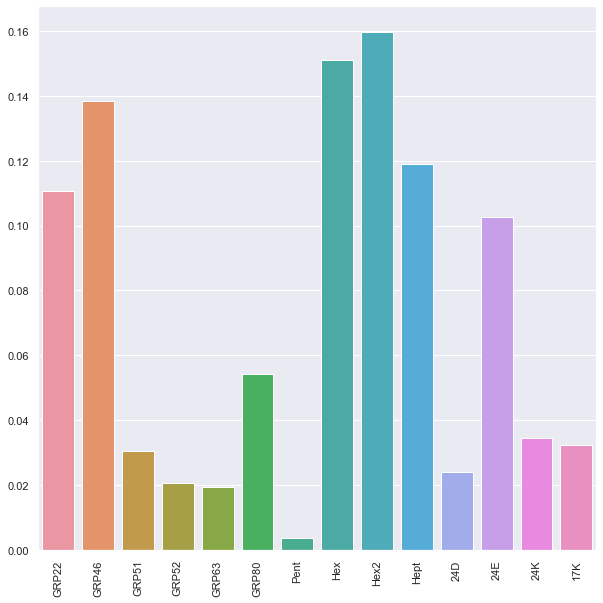

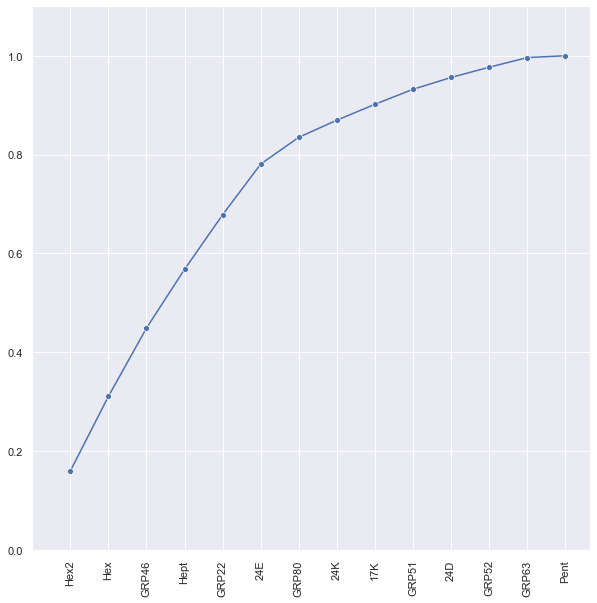

,Feature,Score
0,Hex2,0.159594
1,Hex,0.150993
2,GRP46,0.138308
3,Hept,0.118879
4,GRP22,0.110498
5,24E,0.102636
6,GRP80,0.054101
7,24K,0.034591
8,17K,0.032218
9,GRP51,0.030360


In [24]:
from sklearn.feature_selection import f_classif
ml.calc_feature_importances_kbest(x_train=ml.x, y_train=ml.y, features=ml.features, method_classif=f_classif)

- Run PCA to determine the number of components to use in all following cross-validation splits

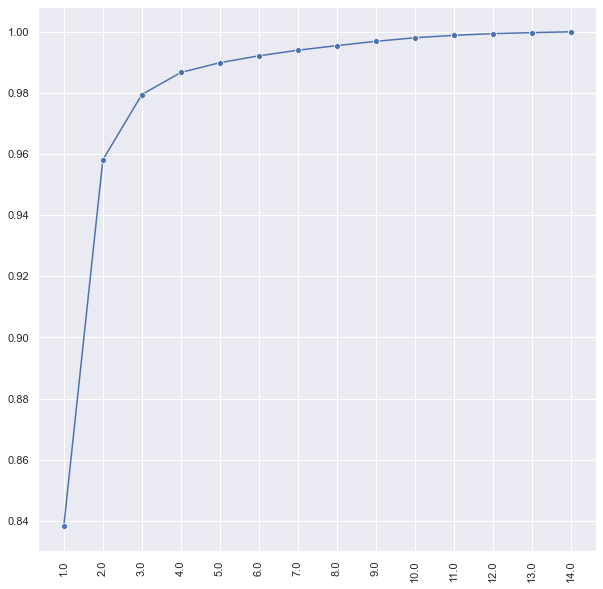

In [25]:
all_features_pca = ml.run_pca(x_train=ml.x, features=ml.features)

Contributions of the 14 barrels to each principal component (see the Scree plot above for how much of the signal in the data is explained by successive principal components)

In [26]:
pca_components = OrderedDict({'Component': [int(n) for n in range(1, 15)]})
for index, feature in enumerate(ml.features):
    pca_components[feature] = all_features_pca.components_[:,index]
pca_components = pd.DataFrame(pca_components)
pca_components = pca_components.set_index('Component', drop=True)

In [27]:
pca_components

,GRP22,GRP46,GRP51,GRP52,GRP63,GRP80,Pent,Hex,Hex2,Hept,24D,24E,24K,17K
Component,,,,,,,,,,,,,,
1,-0.031601,0.212802,-0.008535,-0.003766,0.002612,0.018046,0.017588,0.037706,-0.035966,-0.028250,0.016786,0.016095,-0.017532,0.973974
2,-0.176772,0.806462,-0.048220,-0.005354,0.009798,0.081657,-0.029259,-0.421602,-0.214334,-0.211934,-0.000101,0.032390,-0.072572,-0.182972
3,0.259957,0.510705,0.128027,0.062672,0.024102,0.163513,0.170887,0.535838,0.379127,0.327727,0.129560,0.040992,0.164242,-0.105156
4,-0.308382,0.095153,-0.167912,-0.152878,-0.067818,-0.235752,0.163762,0.664386,-0.266558,-0.400628,-0.172484,-0.131623,-0.177182,-0.076491
5,-0.095289,0.103647,-0.125316,-0.189792,-0.119015,-0.280669,-0.193410,-0.135080,0.645846,0.086564,-0.385193,-0.309184,-0.333056,0.018785
6,-0.067053,0.101770,-0.185464,-0.420097,-0.081669,-0.480740,-0.248555,0.000363,-0.243248,0.423972,0.120378,-0.034020,0.469173,-0.003813
7,-0.674752,-0.089234,-0.081168,-0.014494,0.003071,0.160297,0.308326,-0.091192,0.382348,-0.109252,0.103405,0.043187,0.479688,0.008910
8,0.239600,0.029394,0.062232,0.132222,-0.029969,-0.667090,0.336524,-0.138773,0.221575,-0.323566,0.377113,0.213931,-0.013458,0.002665
9,0.009529,0.007891,-0.146533,0.010572,0.038545,0.093663,-0.741752,0.188521,0.239745,-0.409700,0.274323,0.266019,0.104130,-0.008681


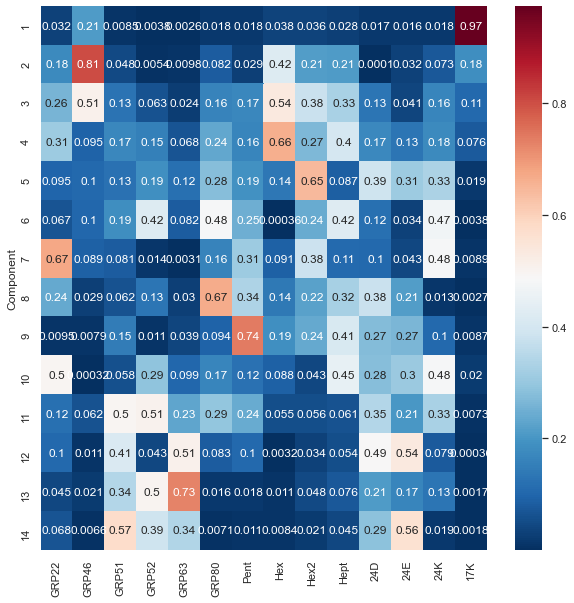

In [28]:
sns.heatmap(data=pca_components.abs(), cmap='RdBu_r', annot=True, xticklabels=True, yticklabels=True)

Relative contribution to the different components of each barrel

In [29]:
col_sums = copy.deepcopy(pca_components).abs().sum(axis=0)
relative_pca_components = copy.deepcopy(pca_components.abs()).div(col_sums, axis=1)

In [30]:
relative_pca_components

,GRP22,GRP46,GRP51,GRP52,GRP63,GRP80,Pent,Hex,Hex2,Hept,24D,24E,24K,17K
Component,,,,,,,,,,,,,,
1,0.011717,0.103388,0.003003,0.001385,0.001142,0.006570,0.006496,0.015851,0.012703,0.009399,0.005262,0.005626,0.006105,0.689540
2,0.065543,0.391811,0.016965,0.001969,0.004285,0.029728,0.010807,0.177236,0.075700,0.070510,0.000032,0.011322,0.025269,0.129538
3,0.096385,0.248121,0.045042,0.023051,0.010541,0.059528,0.063121,0.225260,0.133903,0.109034,0.040614,0.014329,0.057189,0.074447
4,0.114340,0.046229,0.059075,0.056230,0.029662,0.085827,0.060489,0.279300,0.094145,0.133288,0.054070,0.046009,0.061695,0.054153
5,0.035331,0.050356,0.044089,0.069807,0.052053,0.102179,0.071440,0.056786,0.228106,0.028800,0.120750,0.108076,0.115970,0.013299
6,0.024862,0.049444,0.065250,0.154516,0.035719,0.175016,0.091809,0.000152,0.085913,0.141054,0.037736,0.011892,0.163366,0.002699
7,0.250181,0.043354,0.028556,0.005331,0.001343,0.058357,0.113886,0.038336,0.135041,0.036348,0.032415,0.015096,0.167027,0.006308
8,0.088837,0.014281,0.021895,0.048632,0.013108,0.242858,0.124302,0.058339,0.078258,0.107649,0.118217,0.074780,0.004686,0.001886
9,0.003533,0.003834,0.051553,0.003889,0.016859,0.034099,0.273981,0.079252,0.084675,0.136306,0.085995,0.092988,0.036258,0.006146


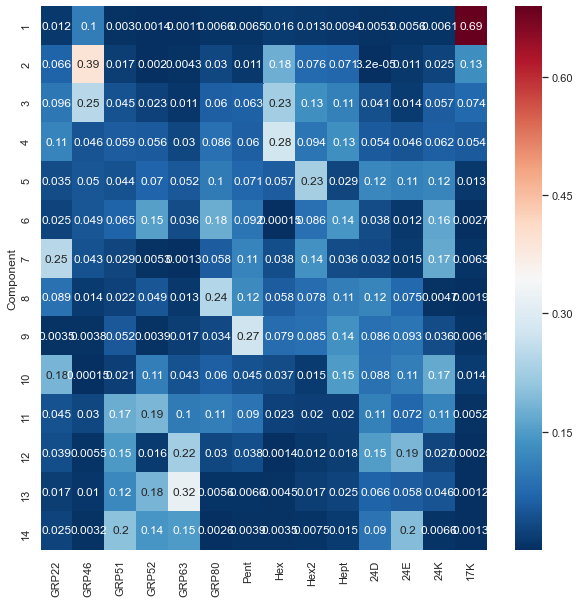

In [31]:
sns.heatmap(data=relative_pca_components.abs(), cmap='RdBu_r', annot=True, xticklabels=True, yticklabels=True)

Scatter plots of data transformed to PCA dimensions

In [32]:
def plot_scatter(x_data, y_data, dimensions, categories, results_dir, plot_id):
    """
    """
    
    from matplotlib.colors import BASE_COLORS, CSS4_COLORS
    from matplotlib.lines import Line2D
    from matplotlib.patches import Patch

    colours = [key for key, val in BASE_COLORS.items()]
    extra_colours = [key for key, val in CSS4_COLORS.items()]
    random.shuffle(extra_colours)
    colours += extra_colours
    markers = ['o', 'x', '^', '*']

    cat_colours = {}
    cat_markers = {}
    for index, cat in enumerate(categories):
        if index == 0:
            current_colour = colours[index]
            cat_colours[cat] = current_colour
            marker_count = 0
            cat_markers[cat] = markers[marker_count]
        else:
            if categories[index-1] == cat:
                cat_colours[cat] = current_colour
                cat_markers[cat] = markers[marker_count]
            elif categories[index-1].split('_')[0] == cat.split('_')[0]:
                cat_colours[cat] = current_colour
                marker_count += 1
                cat_markers[cat] = markers[marker_count]
            else:
                current_colour = colours[index]
                cat_colours[cat] = current_colour
                marker_count = 0
                cat_markers[cat] = markers[marker_count] 

    fig = plt.figure()
    if dimensions == 2:
        ax = fig.add_subplot(111)
        for i, y in np.ndenumerate(y_data):
            scatter = ax.scatter(x_data[i[0],0], x_data[i[0],1], c=cat_colours[y], marker=cat_markers[y])
    elif dimensions == 3:
        ax = fig.add_subplot(111, projection='3d')
        for i, y in np.ndenumerate(y_data):
            scatter = ax.scatter(x_data[i[0],0], x_data[i[0],1], x_data[i[0],2], c=cat_colours[y],
                                 marker=cat_markers[y])

    legend_elements = []
    for cat, colour in cat_colours.items():
        marker = cat_markers[cat]
        legend_elements.append(Line2D([0], [0], marker=marker, color=colour, label=cat, markerfacecolor=colour))
    ax.legend(handles=legend_elements, loc='upper right', title='Classes')

    plt.savefig('{}/{}_{}_PCA_plot.svg'.format(results_dir, plot_id, str(dimensions)))
    plt.show()

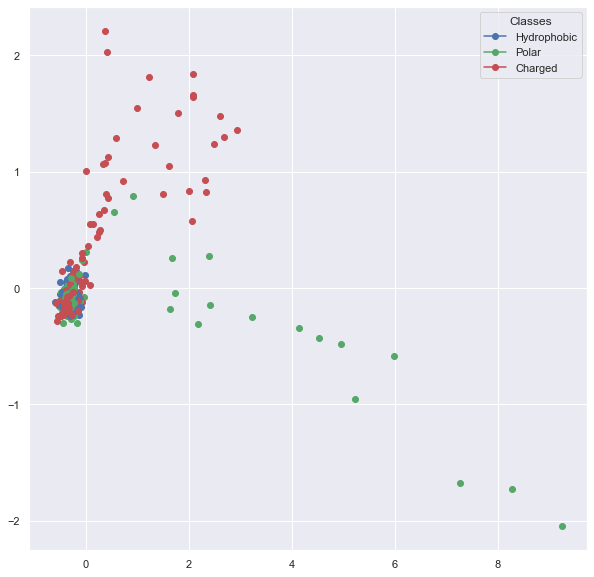

In [33]:
# Runs PCA and transforms data to 2 dimensions 
from sklearn.decomposition import PCA
pca_2d = PCA(n_components=2)
pca_fitted_2d = pca_2d.fit(X=ml.x)
X_reduced_2d = pca_fitted_2d.transform(X=ml.x)

# Plots transformed data on 3D scatter plot
x_train_pca_2d = plot_scatter(
    x_data=X_reduced_2d, y_data=ml.y, dimensions=2, categories=['Hydrophobic', 'Polar', 'Charged'],
    results_dir=ml.results_dir, plot_id='All_data_2D'
)

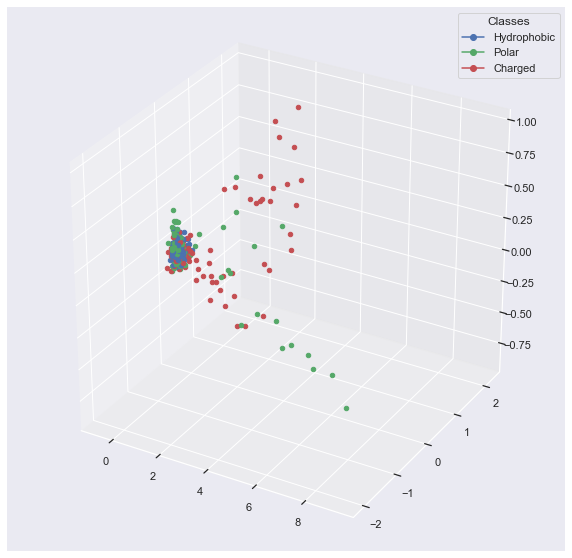

In [34]:
# Runs PCA and transforms data to 3 dimensions 
from sklearn.decomposition import PCA
pca = PCA(n_components=3)
pca_fitted = pca.fit(X=ml.x)
X_reduced = pca_fitted.transform(X=ml.x)

# Plots transformed data on 3D scatter plot
x_train_pca = plot_scatter(
    x_data=X_reduced, y_data=ml.y, dimensions=3, categories=['Hydrophobic', 'Polar', 'Charged'],
    results_dir=ml.results_dir, plot_id='All_data_3D'
)

~98% of the variation in the data can be accounted for with 3 features, so will transform the data to 3 (rather than 14) features.

In [35]:
n_components = 3

Runs randomized search to spot check 5 different ML algorithms with 25 different combinations of the parameters to be optimised, in combination with 5 different methods of dealing with imbalanced classes. Cross-validation loop involves:
- standardisation of the data (i.e. subtraction of the mean and division by the standard deviation) for each feature
- transformation to 3 orthogonal dimensions using PCA
- resampling the data
- randomized search of 25 different hyperparameter combinations for the selected ML algorithm

In [40]:
cv_folds = 5  # Number of splits in cross-validation
n_iter = 25  # Number of parameter combinations to test in RandomisedSearchCV

resampling_methods = ['no_balancing', 'max_sampling', 'smote', 'smoteenn', 'smotetomek']

score_dict = OrderedDict({'Algorithm': [],
                          'Resampling_method': [],
                          'Best_params': [],
                          'Best_f1_score': [],
                          'Mean_f1_score': [],
                          'Std_dev_f1_score': []})

log_reg = LogisticRegression(n_jobs=-1)
knn = KNeighborsClassifier(metric='minkowski', n_jobs=-1)
linear_svc = LinearSVC(dual=False)
svc = SVC()
naive_bayes = GaussianNB()

algorithms = [log_reg, knn, naive_bayes, linear_svc, svc]
for algorithm in algorithms:
    params = ml.define_tuned_model_params(clf=algorithm, x_train=ml.train_x)
    spot_checks, *_ = ml.run_algorithm(
        clf=algorithm, x_train=ml.train_x, y_train=ml.train_y, train_groups=ml.train_groups, x_test=ml.test_x,
        y_test=ml.test_y, n_components_pca=n_components, run='randomsearch', params=params,
        train_scoring_func='f1_macro', test_scoring_funcs=None, resampling_method=resampling_methods,
        n_iter=n_iter, cv_folds=cv_folds
    )

    for method, spot_check in spot_checks.items():
        score_dict['Algorithm'].append(type(algorithm).__name__)
        score_dict['Resampling_method'].append(method)
        score_dict['Best_params'].append(spot_check.best_params_)
        score_dict['Best_f1_score'].append(spot_check.best_score_)
        score_dict['Mean_f1_score'].append(np.nanmean(spot_check.cv_results_['mean_test_score']))
        score_dict['Std_dev_f1_score'].append(np.nanmean(spot_check.cv_results_['std_test_score']))

        print('\n\n\n\n\n')
        print('{}: {}'.format(type(algorithm).__name__, method))
        print('Best parameters: {}'.format(spot_check.best_params_))
        print('Best score: {}'.format(spot_check.best_score_))

        selected_params = spot_check.cv_results_['params']
        selected_params_score = spot_check.cv_results_['mean_test_score']
        print('All parameter combinations tested:')
        for i in range(len(selected_params)):
            print(i+1, selected_params[i], round(selected_params_score[i], 3))
        
score_df = pd.DataFrame(score_dict)

Randomised search with cross-validation results:
Best parameters: {'LogisticRegression__solver': 'saga', 'LogisticRegression__penalty': 'l2', 'LogisticRegression__multi_class': 'multinomial', 'LogisticRegression__C': 3.1622776601683795}
Best score: 0.5303350234383427
Randomised search with cross-validation results:
Best parameters: {'LogisticRegression__solver': 'sag', 'LogisticRegression__penalty': 'l2', 'LogisticRegression__multi_class': 'ovr', 'LogisticRegression__C': 100.0}
Best score: 0.552326642484422
Randomised search with cross-validation results:
Best parameters: {'LogisticRegression__solver': 'saga', 'LogisticRegression__penalty': 'l2', 'LogisticRegression__multi_class': 'ovr', 'LogisticRegression__C': 0.1}
Best score: 0.5466381882105099


/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:1539: UserWarning: 'n_jobs' > 1 does not have any effect when 'solver' is set to 'liblinear'. Got 'n_jobs' = 4.
  " = {}.".format(effective_n_jobs(self.n_jobs)))


Randomised search with cross-validation results:
Best parameters: {'LogisticRegression__solver': 'liblinear', 'LogisticRegression__penalty': 'l1', 'LogisticRegression__multi_class': 'ovr', 'LogisticRegression__C': 31.622776601683793}
Best score: 0.5253731059864944
Randomised search with cross-validation results:
Best parameters: {'LogisticRegression__solver': 'sag', 'LogisticRegression__penalty': 'l2', 'LogisticRegression__multi_class': 'ovr', 'LogisticRegression__C': 10000.0}
Best score: 0.5532008444094745






LogisticRegression: no_balancing
Best parameters: {'LogisticRegression__solver': 'saga', 'LogisticRegression__penalty': 'l2', 'LogisticRegression__multi_class': 'multinomial', 'LogisticRegression__C': 3.1622776601683795}
Best score: 0.5303350234383427
All parameter combinations tested:
1 {'LogisticRegression__solver': 'newton-cg', 'LogisticRegression__penalty': 'l1', 'LogisticRegression__multi_class': 'ovr', 'LogisticRegression__C': 100.0} nan
2 {'LogisticRegression__solver': 

Randomised search with cross-validation results:
Best parameters: {'KNeighborsClassifier__weights': 'uniform', 'KNeighborsClassifier__p': 1, 'KNeighborsClassifier__n_neighbors': 13}
Best score: 0.5139012195378164
Randomised search with cross-validation results:
Best parameters: {'KNeighborsClassifier__weights': 'uniform', 'KNeighborsClassifier__p': 2, 'KNeighborsClassifier__n_neighbors': 26}
Best score: 0.5186758777925575
Randomised search with cross-validation results:
Best parameters: {'KNeighborsClassifier__weights': 'uniform', 'KNeighborsClassifier__p': 1, 'KNeighborsClassifier__n_neighbors': 18}
Best score: 0.510741718525367
Randomised search with cross-validation results:
Best parameters: {'KNeighborsClassifier__weights': 'distance', 'KNeighborsClassifier__p': 1, 'KNeighborsClassifier__n_neighbors': 4}
Best score: 0.49719396951669026
Randomised search with cross-validation results:
Best parameters: {'KNeighborsClassifier__weights': 'distance', 'KNeighborsClassifier__p': 1, 'KNeig

Randomised search with cross-validation results:
Best parameters: {}
Best score: 0.529540465038859
Randomised search with cross-validation results:
Best parameters: {}
Best score: 0.46303986017241855
Randomised search with cross-validation results:
Best parameters: {}
Best score: 0.5033622708015655






GaussianNB: no_balancing
Best parameters: {}
Best score: 0.5089102981597489
All parameter combinations tested:
1 {} 0.509






GaussianNB: max_sampling
Best parameters: {}
Best score: 0.5138674702222932
All parameter combinations tested:
1 {} 0.514






GaussianNB: smote
Best parameters: {}
Best score: 0.529540465038859
All parameter combinations tested:
1 {} 0.53






GaussianNB: smoteenn
Best parameters: {}
Best score: 0.46303986017241855
All parameter combinations tested:
1 {} 0.463






GaussianNB: smotetomek
Best parameters: {}
Best score: 0.5033622708015655
All parameter combinations tested:
1 {} 0.503
Randomised search with cross-validation results:
Best parameters: {'Linear

Randomised search with cross-validation results:
Best parameters: {'SVC__gamma': 0.00017263349150062197, 'SVC__C': 23170.47500592079}
Best score: 0.48649488170475397
Randomised search with cross-validation results:
Best parameters: {'SVC__gamma': 0.0078125, 'SVC__C': 45.254833995939045}
Best score: 0.5421174417977354






SVC: no_balancing
Best parameters: {'SVC__gamma': 0.02209708691207961, 'SVC__C': 256.0}
Best score: 0.5623576629738106
All parameter combinations tested:
1 {'SVC__gamma': 2.0, 'SVC__C': 2896.309375740099} 0.401
2 {'SVC__gamma': 8.0, 'SVC__C': 1.0} 0.346
3 {'SVC__gamma': 0.00017263349150062197, 'SVC__C': 1024.0} 0.495
4 {'SVC__gamma': 8.0, 'SVC__C': 181.01933598375618} 0.371
5 {'SVC__gamma': 0.00390625, 'SVC__C': 0.1767766952966369} 0.315
6 {'SVC__gamma': 0.1767766952966369, 'SVC__C': 16.0} 0.533
7 {'SVC__gamma': 0.7071067811865476, 'SVC__C': 4096.0} 0.434
8 {'SVC__gamma': 0.04419417382415922, 'SVC__C': 1448.1546878700494} 0.486
9 {'SVC__gamma': 0.0009765625, 'SVC__C'

In [41]:
score_df

,Algorithm,Resampling_method,Best_params,Best_f1_score,Mean_f1_score,Std_dev_f1_score
0,LogisticRegression,no_balancing,"{'LogisticRegression__solver': 'saga', 'Logist...",0.530335,0.468450,0.044060
1,LogisticRegression,max_sampling,"{'LogisticRegression__solver': 'sag', 'Logisti...",0.552327,0.505050,0.035057
2,LogisticRegression,smote,"{'LogisticRegression__solver': 'saga', 'Logist...",0.546638,0.536309,0.069658
3,LogisticRegression,smoteenn,"{'LogisticRegression__solver': 'liblinear', 'L...",0.525373,0.454088,0.057319
4,LogisticRegression,smotetomek,"{'LogisticRegression__solver': 'sag', 'Logisti...",0.553201,0.509905,0.062836
5,KNeighborsClassifier,no_balancing,"{'KNeighborsClassifier__weights': 'uniform', '...",0.513901,0.477705,0.045111
6,KNeighborsClassifier,max_sampling,"{'KNeighborsClassifier__weights': 'uniform', '...",0.518676,0.477843,0.045131
7,KNeighborsClassifier,smote,"{'KNeighborsClassifier__weights': 'uniform', '...",0.510742,0.482851,0.064167
8,KNeighborsClassifier,smoteenn,"{'KNeighborsClassifier__weights': 'distance', ...",0.497194,0.351317,0.100747
9,KNeighborsClassifier,smotetomek,"{'KNeighborsClassifier__weights': 'distance', ...",0.510432,0.467655,0.047061


So, from this spot check, a **support vector classifier with linear kernel** and class balancing using **smotetomek** does a good job.

So, run hyperparameter optimisation for LinearSVC with SMOTETOMEK.

In [42]:
fixed_params = ml.define_fixed_model_params(clf=LinearSVC())
random_tuned_params = ml.define_tuned_model_params(clf=LinearSVC(), x_train=ml.train_x)

svc_random_search = ml.run_ml(
    clf=LinearSVC, x_train=ml.train_x, y_train=ml.train_y, train_groups=None, x_test=ml.test_x,
    y_test=ml.test_y, n_components_pca=n_components, run='random search', fixed_params=fixed_params,
    tuned_params=random_tuned_params, train_scoring_func='f1_macro', test_scoring_funcs=None,
    resampling_method=['smotetomek'], n_iter='', cv_folds=cv_folds
)

Randomised search with cross-validation results:
Best parameters: {'LinearSVC__C': 1.0}
Best score: 0.5591377234311655


In [43]:
grid_tuned_params = {'C': np.linspace(0.1, 10, 100)}

svc_grid_search = ml.run_ml(
    clf=LinearSVC, x_train=ml.train_x, y_train=ml.train_y, train_groups=None, x_test=ml.test_x,
    y_test=ml.test_y, n_components_pca=n_components, run='grid search', fixed_params=fixed_params,
    tuned_params=grid_tuned_params, train_scoring_func='f1_macro', test_scoring_funcs=None,
    resampling_method=['smotetomek'], n_iter='', cv_folds=cv_folds
)

Grid search with cross-validation results:
Best parameters: {'LinearSVC__C': 7.0}
Best score: 0.5690172224193091


### So, optimal hyperparameter combination:
- C = 7

Model cross-validation score: [0.49377476 0.50538953 0.58660085 0.5915979  0.5037037 ]
accuracy_score: 0.5194805194805194
recall_score: 0.5234567901234568
precision_score: 0.5423838160411051
f1_score: 0.5286540271614898
cohen_kappa_score: 0.26153447382063244
None


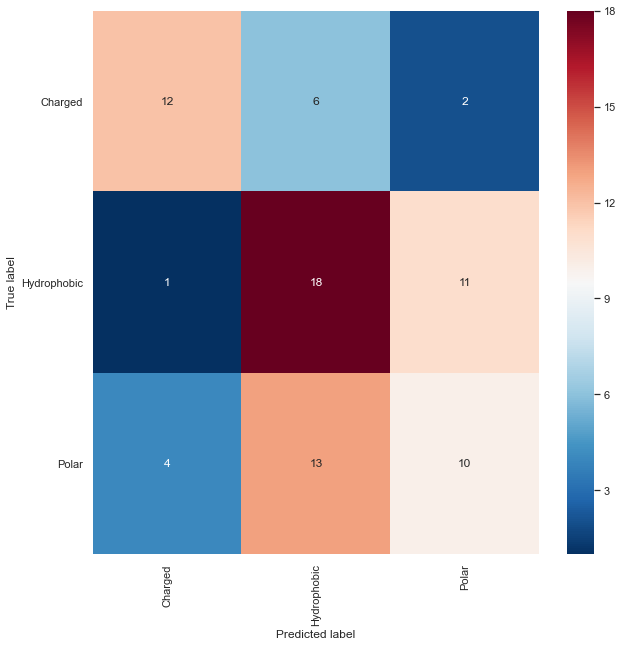

true


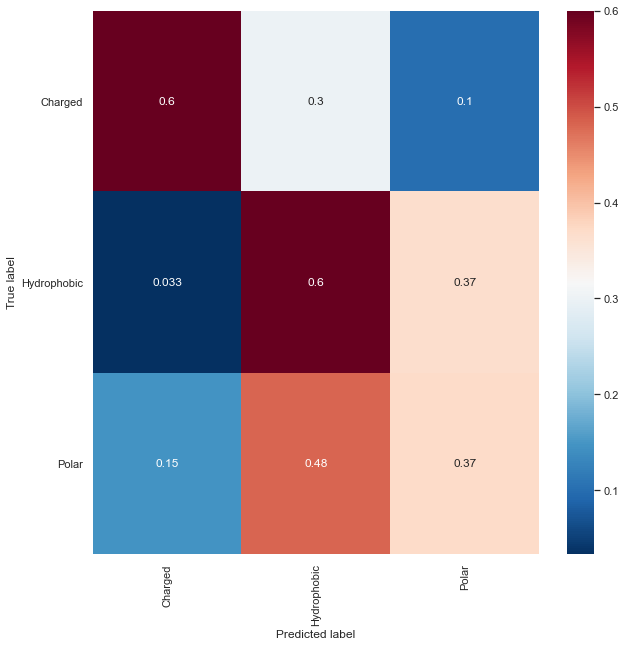

pred


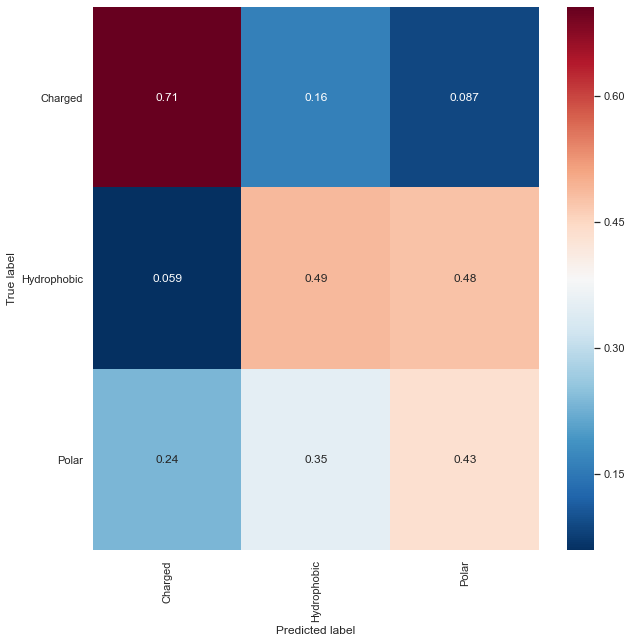

In [44]:
final_params = {'C': 7}

scoring_funcs={accuracy_score: {},
               recall_score: {'average': 'macro'},
               precision_score: {'average': 'macro'},
               f1_score: {'average': 'macro'},
               cohen_kappa_score: {}}

svc_clf, train_scores, test_scores, predictions = ml.run_ml(
    clf=LinearSVC, x_train=ml.train_x, y_train=ml.train_y, train_groups=None, x_test=ml.test_x,
    y_test=ml.test_y, n_components_pca=n_components, run='train', fixed_params=fixed_params,
    tuned_params=final_params, train_scoring_func='f1_macro', test_scoring_funcs=scoring_funcs,
    resampling_method=['smotetomek'], n_iter='', cv_folds=cv_folds
)

How well does the trained classifier predict the different classes?

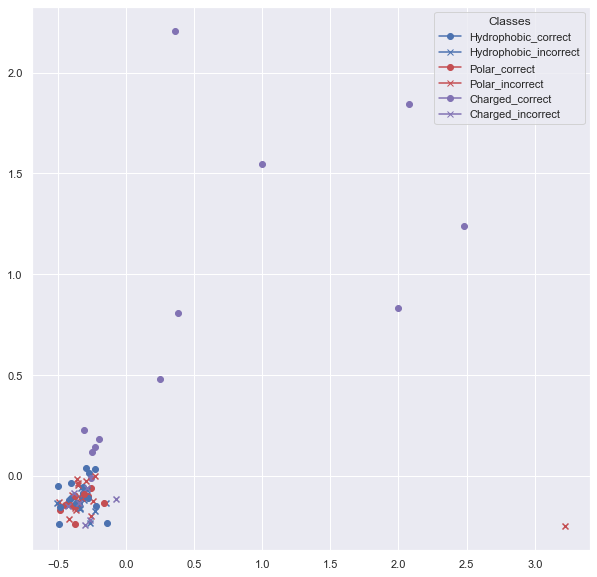

In [48]:
X_test_reduced = pca_fitted.transform(X=ml.test_x)
y_test_pred_hue = []
for index, y in np.ndenumerate(ml.test_y):
    if predictions[index] == y:
        y_test_pred_hue.append('{}_correct'.format(y))
    else:
        y_test_pred_hue.append('{}_incorrect'.format(y))

# Plots transformed data on 3D scatter plot
x_train_pca = plot_scatter(
    x_data=X_test_reduced, y_data=y_test_pred_hue, dimensions=2,
    categories=['Hydrophobic_correct', 'Hydrophobic_incorrect', 'Polar_correct',
                'Polar_incorrect', 'Charged_correct', 'Charged_incorrect'],
    results_dir=ml.results_dir, plot_id='Test_data'
)

Aliphatic hydrophobic / aromatic / polar / charged / glycine / proline

First split the data into a training and test set

In [49]:
ml = RunML(
    results_dir='/Users/ks17361/Lab_work_Dek_Woolfson/BADASS/array_sensing/Analysis/Standard_array/AAs/'
                'AAs_6classes_ML_results/', fluor_data=class_6_fluor_data
)

In [50]:
ml.split_train_test_data(randomise=True, percent_test=0.2, test_analytes=[])

On all of the data (training and test sets):

- Visualise correlation between the initial 14 features

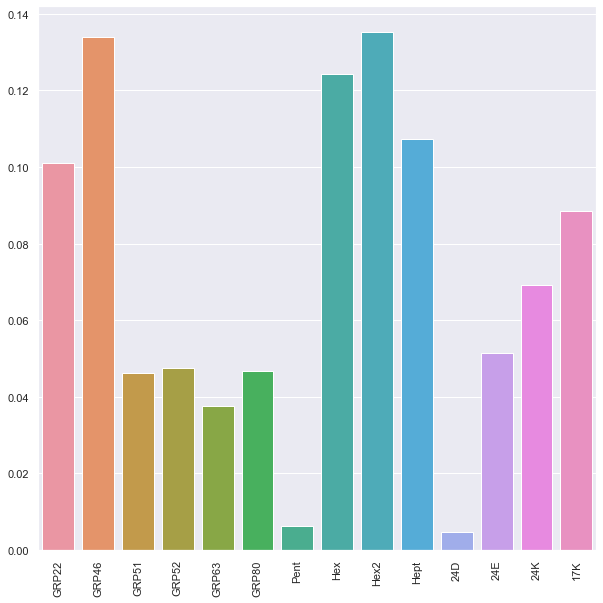

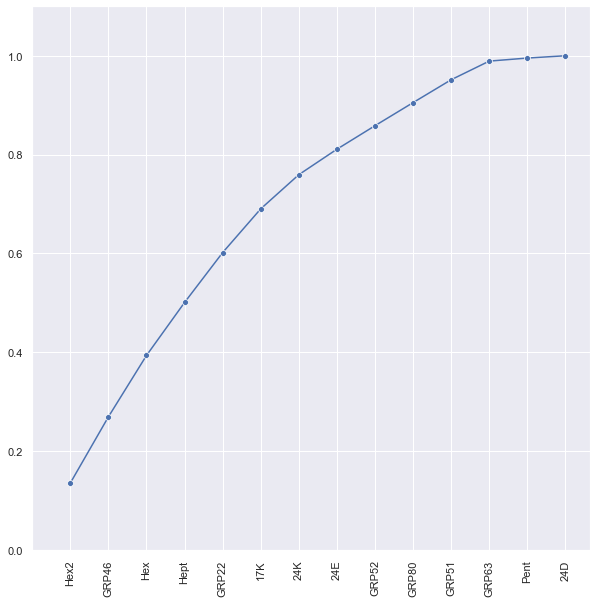

,Feature,Score
0,Hex2,0.135218
1,GRP46,0.134009
2,Hex,0.124227
3,Hept,0.107272
4,GRP22,0.100961
5,17K,0.088522
6,24K,0.069100
7,24E,0.051531
8,GRP52,0.047591
9,GRP80,0.046743


In [51]:
from sklearn.feature_selection import f_classif
ml.calc_feature_importances_kbest(x_train=ml.x, y_train=ml.y, features=ml.features, method_classif=f_classif)

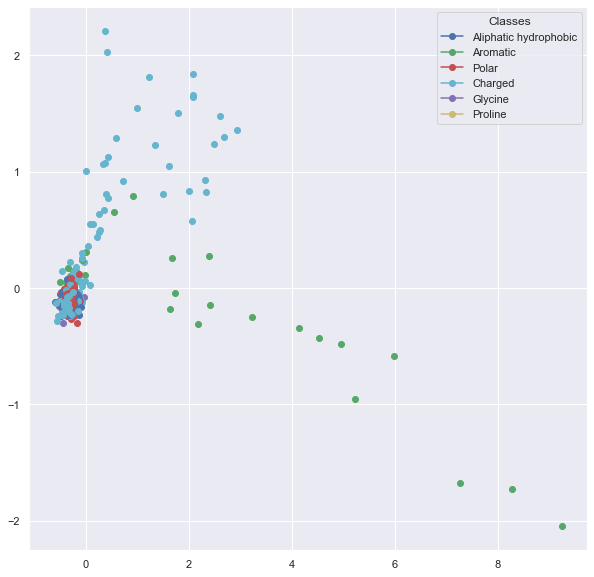

In [52]:
# Runs PCA and transforms data to 2 dimensions 
from sklearn.decomposition import PCA
pca_2d = PCA(n_components=2)
pca_fitted_2d = pca_2d.fit(X=ml.x)
X_reduced_2d = pca_fitted_2d.transform(X=ml.x)

# Plots transformed data on 2D scatter plot
x_train_pca_2d = plot_scatter(
    x_data=X_reduced_2d, y_data=ml.y, dimensions=2, categories=['Aliphatic hydrophobic', 'Aromatic', 'Polar',
                                                                'Charged', 'Glycine', 'Proline'],
    results_dir=ml.results_dir, plot_id='All_data_2D'
)

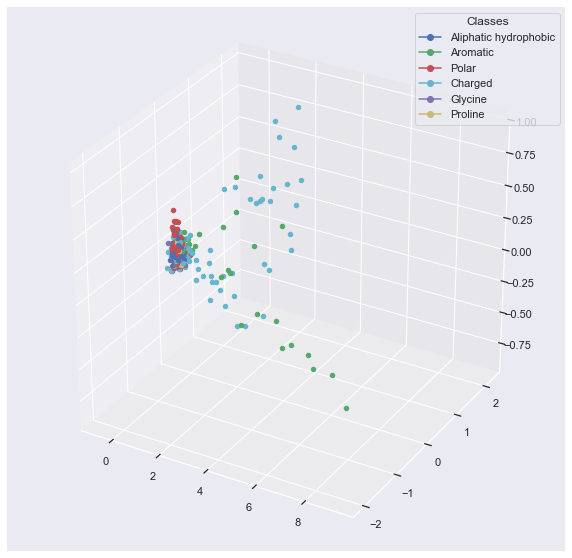

In [53]:
# Runs PCA and transforms data to 3 dimensions 
from sklearn.decomposition import PCA
pca = PCA(n_components=3)
pca_fitted = pca.fit(X=ml.x)
X_reduced = pca_fitted.transform(X=ml.x)

# Plots transformed data on 3D scatter plot
x_train_pca = plot_scatter(
    x_data=X_reduced, y_data=ml.y, dimensions=3, categories=['Aliphatic hydrophobic', 'Aromatic', 'Polar',
                                                             'Charged', 'Glycine', 'Proline'],
    results_dir=ml.results_dir, plot_id='All_data_3D'
)

From the PCA analysis above (run on the same data points even though the class labels are different), ~98% of the variation in the data can be accounted for with 3 features, so will transform the data to 3 (rather than 14) features.

In [54]:
n_components = 3

Runs randomized search to spot check 5 different ML algorithms with 25 different combinations of the parameters to be optimised, in combination with 5 different methods of dealing with imbalanced classes. Cross-validation loop involves:
- standardisation of the data (i.e. subtraction of the mean and division by the standard deviation) for each feature
- transformation to 3 orthogonal dimensions using PCA
- resampling the data
- randomized search of 25 different hyperparameter combinations for the selected ML algorithm

In [55]:
cv_folds = 5  # Number of splits in cross-validation
n_iter = 25  # Number of parameter combinations to test in RandomisedSearchCV

resampling_methods = ['no_balancing', 'max_sampling', 'smote', 'smoteenn', 'smotetomek']

score_dict = OrderedDict({'Algorithm': [],
                          'Resampling_method': [],
                          'Best_params': [],
                          'Best_f1_score': [],
                          'Mean_f1_score': [],
                          'Std_dev_f1_score': []})

log_reg = LogisticRegression(n_jobs=-1)
knn = KNeighborsClassifier(metric='minkowski', n_jobs=-1)
linear_svc = LinearSVC(dual=False)
svc = SVC()
naive_bayes = GaussianNB()

algorithms = [log_reg, knn, naive_bayes, linear_svc, svc]
for algorithm in algorithms:
    params = ml.define_tuned_model_params(clf=algorithm, x_train=ml.train_x)  # Actual number of x samples will be
    # different owing to oversampling, but don't want to hard code this selection into the pipeline, so for now
    # this estimate will do
    spot_checks, *_ = ml.run_algorithm(
        clf=algorithm, x_train=ml.train_x, y_train=ml.train_y, train_groups=ml.train_groups, x_test=ml.test_x,
        y_test=ml.test_y, n_components_pca=n_components, run='randomsearch', params=params,
        train_scoring_func='f1_macro', test_scoring_funcs=None, resampling_method=resampling_methods,
        n_iter=n_iter, cv_folds=cv_folds
    )

    for method, spot_check in spot_checks.items():
        score_dict['Algorithm'].append(type(algorithm).__name__)
        score_dict['Resampling_method'].append(method)
        score_dict['Best_params'].append(spot_check.best_params_)
        score_dict['Best_f1_score'].append(spot_check.best_score_)
        score_dict['Mean_f1_score'].append(np.nanmean(spot_check.cv_results_['mean_test_score']))
        score_dict['Std_dev_f1_score'].append(np.nanmean(spot_check.cv_results_['std_test_score']))

        print('\n\n\n\n\n')
        print('{}: {}'.format(type(algorithm).__name__, method))
        print('Best parameters: {}'.format(spot_check.best_params_))
        print('Best score: {}'.format(spot_check.best_score_))

        selected_params = spot_check.cv_results_['params']
        selected_params_score = spot_check.cv_results_['mean_test_score']
        print('All parameter combinations tested:')
        for i in range(len(selected_params)):
            print(i+1, selected_params[i], round(selected_params_score[i], 3))
        
score_df = pd.DataFrame(score_dict)

/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)


Randomised search with cross-validation results:
Best parameters: {'LogisticRegression__solver': 'saga', 'LogisticRegression__penalty': 'l2', 'LogisticRegression__multi_class': 'multinomial', 'LogisticRegression__C': 3162.2776601683795}
Best score: 0.3170285661993065
Randomised search with cross-validation results:
Best parameters: {'LogisticRegression__solver': 'newton-cg', 'LogisticRegression__penalty': 'l2', 'LogisticRegression__multi_class': 'multinomial', 'LogisticRegression__C': 31622.776601683792}
Best score: 0.30650871852592426
Randomised search with cross-validation results:
Best parameters: {'LogisticRegression__solver': 'lbfgs', 'LogisticRegression__penalty': 'l2', 'LogisticRegression__multi_class': 'ovr', 'LogisticRegression__C': 3162.2776601683795}
Best score: 0.282184377312388


/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:1539: UserWarning: 'n_jobs' > 1 does not have any effect when 'solver' is set to 'liblinear'. Got 'n_jobs' = 4.
  " = {}.".format(effective_n_jobs(self.n_jobs)))


Randomised search with cross-validation results:
Best parameters: {'LogisticRegression__solver': 'liblinear', 'LogisticRegression__penalty': 'l1', 'LogisticRegression__multi_class': 'ovr', 'LogisticRegression__C': 10000.0}
Best score: 0.22133344406307504


/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:1539: UserWarning: 'n_jobs' > 1 does not have any effect when 'solver' is set to 'liblinear'. Got 'n_jobs' = 4.
  " = {}.".format(effective_n_jobs(self.n_jobs)))


Randomised search with cross-validation results:
Best parameters: {'LogisticRegression__solver': 'liblinear', 'LogisticRegression__penalty': 'l1', 'LogisticRegression__multi_class': 'ovr', 'LogisticRegression__C': 31.622776601683793}
Best score: 0.26535212995286483






LogisticRegression: no_balancing
Best parameters: {'LogisticRegression__solver': 'saga', 'LogisticRegression__penalty': 'l2', 'LogisticRegression__multi_class': 'multinomial', 'LogisticRegression__C': 3162.2776601683795}
Best score: 0.3170285661993065
All parameter combinations tested:
1 {'LogisticRegression__solver': 'newton-cg', 'LogisticRegression__penalty': 'l1', 'LogisticRegression__multi_class': 'multinomial', 'LogisticRegression__C': 0.31622776601683794} nan
2 {'LogisticRegression__solver': 'newton-cg', 'LogisticRegression__penalty': 'l2', 'LogisticRegression__multi_class': 'ovr', 'LogisticRegression__C': 10.0} 0.302
3 {'LogisticRegression__solver': 'lbfgs', 'LogisticRegression__penalty': 'l2', 'LogisticRegressi

Randomised search with cross-validation results:
Best parameters: {'KNeighborsClassifier__weights': 'uniform', 'KNeighborsClassifier__p': 2, 'KNeighborsClassifier__n_neighbors': 11}
Best score: 0.2985736282180743
Randomised search with cross-validation results:
Best parameters: {'KNeighborsClassifier__weights': 'distance', 'KNeighborsClassifier__p': 2, 'KNeighborsClassifier__n_neighbors': 57}
Best score: 0.30880232734444724
Randomised search with cross-validation results:
Best parameters: {'KNeighborsClassifier__weights': 'distance', 'KNeighborsClassifier__p': 2, 'KNeighborsClassifier__n_neighbors': 4}
Best score: 0.3252247722364722
Randomised search with cross-validation results:
Best parameters: {'KNeighborsClassifier__weights': 'distance', 'KNeighborsClassifier__p': 2, 'KNeighborsClassifier__n_neighbors': 11}
Best score: 0.19900125389517473
Randomised search with cross-validation results:
Best parameters: {'KNeighborsClassifier__weights': 'uniform', 'KNeighborsClassifier__p': 1, 'KN

Randomised search with cross-validation results:
Best parameters: {}
Best score: 0.18583233291036652
Randomised search with cross-validation results:
Best parameters: {}
Best score: 0.23297940068552983






GaussianNB: no_balancing
Best parameters: {}
Best score: 0.2542604217547009
All parameter combinations tested:
1 {} 0.254






GaussianNB: max_sampling
Best parameters: {}
Best score: 0.26163905999232395
All parameter combinations tested:
1 {} 0.262






GaussianNB: smote
Best parameters: {}
Best score: 0.2661876283150205
All parameter combinations tested:
1 {} 0.266






GaussianNB: smoteenn
Best parameters: {}
Best score: 0.18583233291036652
All parameter combinations tested:
1 {} 0.186






GaussianNB: smotetomek
Best parameters: {}
Best score: 0.23297940068552983
All parameter combinations tested:
1 {} 0.233
Randomised search with cross-validation results:
Best parameters: {'LinearSVC__C': 0.25}
Best score: 0.30999062113048415
Randomised search with cross-validation results

In [56]:
score_df

,Algorithm,Resampling_method,Best_params,Best_f1_score,Mean_f1_score,Std_dev_f1_score
0,LogisticRegression,no_balancing,"{'LogisticRegression__solver': 'saga', 'Logist...",0.317029,0.274814,0.033442
1,LogisticRegression,max_sampling,"{'LogisticRegression__solver': 'newton-cg', 'L...",0.306509,0.277294,0.039157
2,LogisticRegression,smote,"{'LogisticRegression__solver': 'lbfgs', 'Logis...",0.282184,0.226407,0.044099
3,LogisticRegression,smoteenn,"{'LogisticRegression__solver': 'liblinear', 'L...",0.221333,0.196576,0.039986
4,LogisticRegression,smotetomek,"{'LogisticRegression__solver': 'liblinear', 'L...",0.265352,0.246310,0.032494
5,KNeighborsClassifier,no_balancing,"{'KNeighborsClassifier__weights': 'uniform', '...",0.298574,0.274267,0.023923
6,KNeighborsClassifier,max_sampling,"{'KNeighborsClassifier__weights': 'distance', ...",0.308802,0.271140,0.054855
7,KNeighborsClassifier,smote,"{'KNeighborsClassifier__weights': 'distance', ...",0.325225,0.274532,0.046573
8,KNeighborsClassifier,smoteenn,"{'KNeighborsClassifier__weights': 'distance', ...",0.199001,0.117148,0.032178
9,KNeighborsClassifier,smotetomek,"{'KNeighborsClassifier__weights': 'uniform', '...",0.289520,0.252556,0.055683


So, from this spot check, a **k nearest neighbours classifier** with class rebalancing using **smote** does a good job.

So, run hyperparameter optimisation for KNN with SMOTE.

In [57]:
fixed_params = ml.define_fixed_model_params(clf=KNeighborsClassifier())
random_tuned_params = ml.define_tuned_model_params(clf=KNeighborsClassifier(), x_train=ml.train_x)

knn_random_search = ml.run_ml(
    clf=KNeighborsClassifier, x_train=ml.train_x, y_train=ml.train_y, train_groups=None, x_test=ml.test_x,
    y_test=ml.test_y, n_components_pca=n_components, run='random search', fixed_params=fixed_params,
    tuned_params=random_tuned_params, train_scoring_func='f1_macro', test_scoring_funcs=None,
    resampling_method=['smote'], n_iter='', cv_folds=cv_folds
)

Randomised search with cross-validation results:
Best parameters: {'KNeighborsClassifier__weights': 'distance', 'KNeighborsClassifier__p': 2, 'KNeighborsClassifier__n_neighbors': 9}
Best score: 0.31185836578664233


In [59]:
grid_tuned_params = {'n_neighbors': [int(n) for n in np.linspace(2, 20)],
                     'p': np.array([1, 2]),
                     'weights': ['uniform', 'distance']}

knn_grid_search = ml.run_ml(
    clf=KNeighborsClassifier, x_train=ml.train_x, y_train=ml.train_y, train_groups=None, x_test=ml.test_x,
    y_test=ml.test_y, n_components_pca=n_components, run='grid search', fixed_params=fixed_params,
    tuned_params=grid_tuned_params, train_scoring_func='f1_macro', test_scoring_funcs=None,
    resampling_method=['smote'], n_iter='', cv_folds=cv_folds
)

Grid search with cross-validation results:
Best parameters: {'KNeighborsClassifier__n_neighbors': 10, 'KNeighborsClassifier__p': 2, 'KNeighborsClassifier__weights': 'distance'}
Best score: 0.32126486888855044


### So, optimal hyperparameter combination:
- n_neighbors = 10
- p = 2
- weights = 'distance'

Model cross-validation score: [0.27480718 0.33425023 0.22863757 0.38872582 0.25932403]
accuracy_score: 0.4025974025974026
recall_score: 0.3874933545986177
precision_score: 0.3751424501424501
f1_score: 0.3541837578634312
cohen_kappa_score: 0.27521997135256804
None


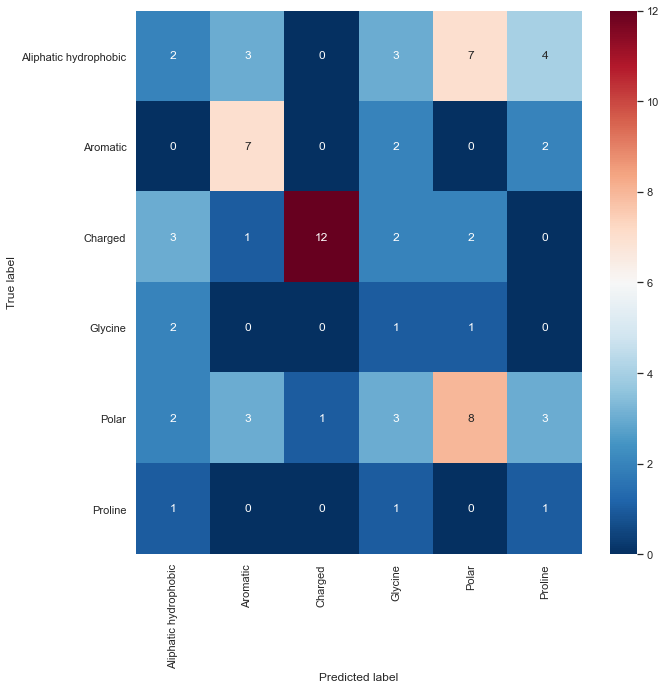

true


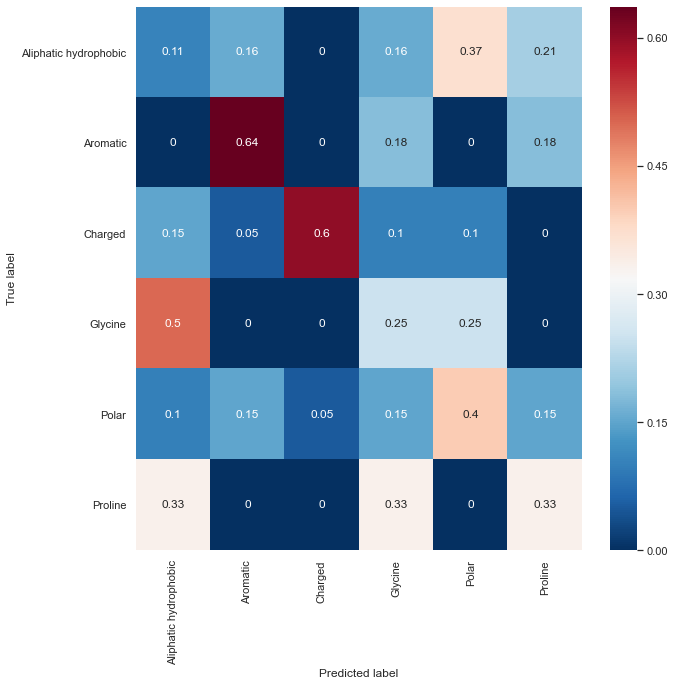

pred


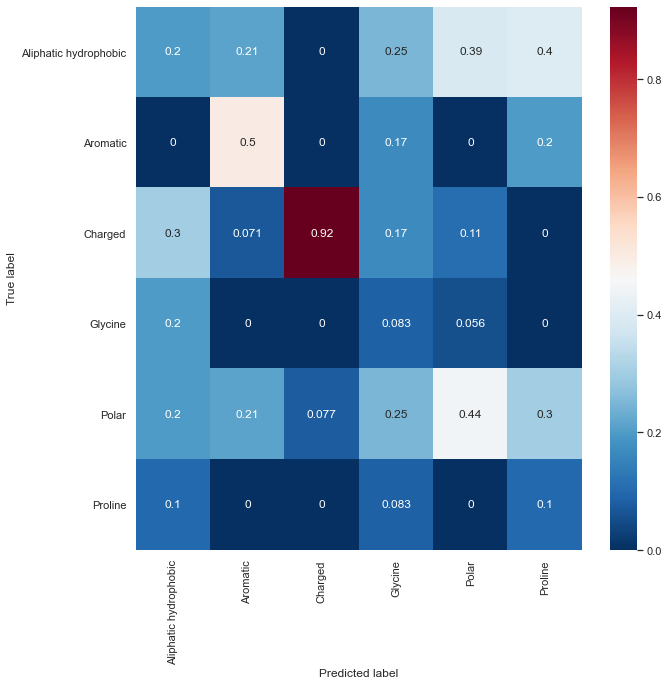

In [60]:
final_params = {'n_neighbors': 10,
                'p': 2,
                'weights': 'distance'}

scoring_funcs={accuracy_score: {},
               recall_score: {'average': 'macro'},
               precision_score: {'average': 'macro'},
               f1_score: {'average': 'macro'},
               cohen_kappa_score: {}}

knn_clf, train_scores, test_scores, predictions = ml.run_ml(
    clf=KNeighborsClassifier, x_train=ml.train_x, y_train=ml.train_y, train_groups=None, x_test=ml.test_x,
    y_test=ml.test_y, n_components_pca=n_components, run='train', fixed_params=fixed_params,
    tuned_params=final_params, train_scoring_func='f1_macro', test_scoring_funcs=scoring_funcs,
    resampling_method=['smote'], n_iter='', cv_folds=cv_folds
)

The ability of the model to distinguish between the classes agrees well with the classes one might predict to be the easiest to distinguish based upon the box plot distributions above.

How well does the trained classifier predict the different classes?

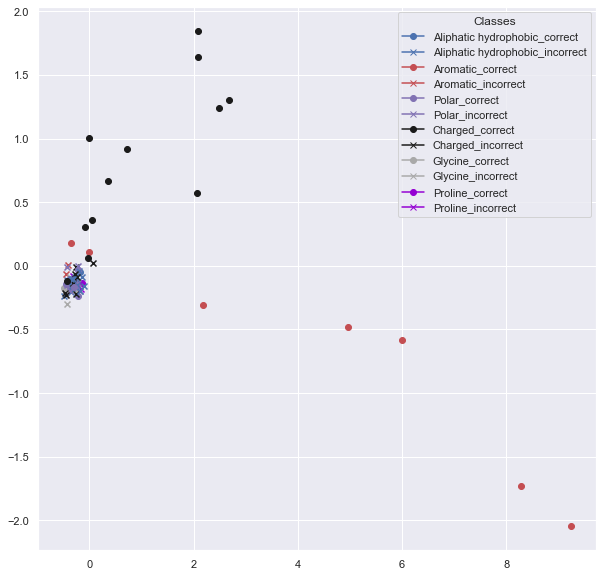

In [62]:
X_test_reduced = pca_fitted.transform(X=ml.test_x)
y_test_pred_hue = []
for index, y in np.ndenumerate(ml.test_y):
    if predictions[index] == y:
        y_test_pred_hue.append('{}_correct'.format(y))
    else:
        y_test_pred_hue.append('{}_incorrect'.format(y))

# Plots transformed data on 3D scatter plot
x_train_pca = plot_scatter(
    x_data=X_test_reduced, y_data=y_test_pred_hue, dimensions=2,
    categories=['Aliphatic hydrophobic_correct', 'Aliphatic hydrophobic_incorrect', 'Aromatic_correct',
                'Aromatic_incorrect', 'Polar_correct', 'Polar_incorrect', 'Charged_correct', 'Charged_incorrect',
                'Glycine_correct', 'Glycine_incorrect', 'Proline_correct', 'Proline_incorrect'],
    results_dir=ml.results_dir, plot_id='Test_data'
)

E / R / S / V / W

First split the data into a training and test set

In [63]:
ml = RunML(
    results_dir='/Users/ks17361/Lab_work_Dek_Woolfson/BADASS/array_sensing/Analysis/Standard_array/AAs/'
                'AAs_ERSVW_ML_results/', fluor_data=sub_aa_fluor_data
)

In [64]:
ml.split_train_test_data(randomise=True, percent_test=0.2, test_analytes=[])

On all of the data (training and test sets):

- Visualise correlation between the initial 14 features

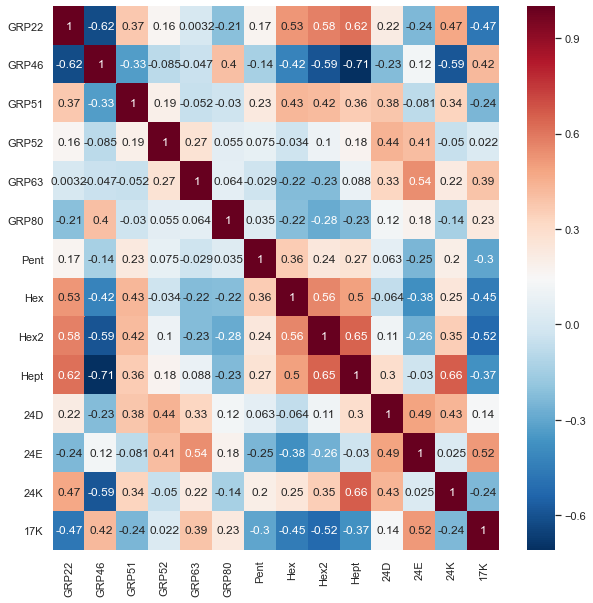

,GRP22,GRP46,GRP51,GRP52,GRP63,GRP80,Pent,Hex,Hex2,Hept,24D,24E,24K,17K
GRP22,1.000000,-0.621266,0.373393,0.161128,0.003180,-0.214113,0.167369,0.525881,0.575674,0.618410,0.216838,-0.236352,0.473867,-0.471191
GRP46,-0.621266,1.000000,-0.331449,-0.084872,-0.046937,0.399568,-0.137198,-0.422382,-0.592043,-0.709151,-0.227939,0.122844,-0.586727,0.424590
GRP51,0.373393,-0.331449,1.000000,0.192619,-0.051521,-0.029811,0.226079,0.429475,0.416610,0.361236,0.379418,-0.080888,0.338350,-0.242400
GRP52,0.161128,-0.084872,0.192619,1.000000,0.265935,0.055422,0.074851,-0.034371,0.101506,0.176142,0.442616,0.410465,-0.049733,0.021530
GRP63,0.003180,-0.046937,-0.051521,0.265935,1.000000,0.063870,-0.029043,-0.224014,-0.228083,0.087933,0.332181,0.539490,0.222418,0.386055
GRP80,-0.214113,0.399568,-0.029811,0.055422,0.063870,1.000000,0.035296,-0.216898,-0.282508,-0.234467,0.124524,0.181542,-0.140930,0.226595
Pent,0.167369,-0.137198,0.226079,0.074851,-0.029043,0.035296,1.000000,0.360480,0.244596,0.267747,0.062718,-0.248137,0.204452,-0.303186
Hex,0.525881,-0.422382,0.429475,-0.034371,-0.224014,-0.216898,0.360480,1.000000,0.561932,0.497126,-0.064470,-0.378206,0.249133,-0.450765
Hex2,0.575674,-0.592043,0.416610,0.101506,-0.228083,-0.282508,0.244596,0.561932,1.000000,0.651629,0.109499,-0.263882,0.354947,-0.516124
Hept,0.618410,-0.709151,0.361236,0.176142,0.087933,-0.234467,0.267747,0.497126,0.651629,1.000000,0.298302,-0.029931,0.660006,-0.374989


In [65]:
ml.calc_feature_correlations(train_data=ml.fluor_data)

- Measure the relative importances of the initial 14 features

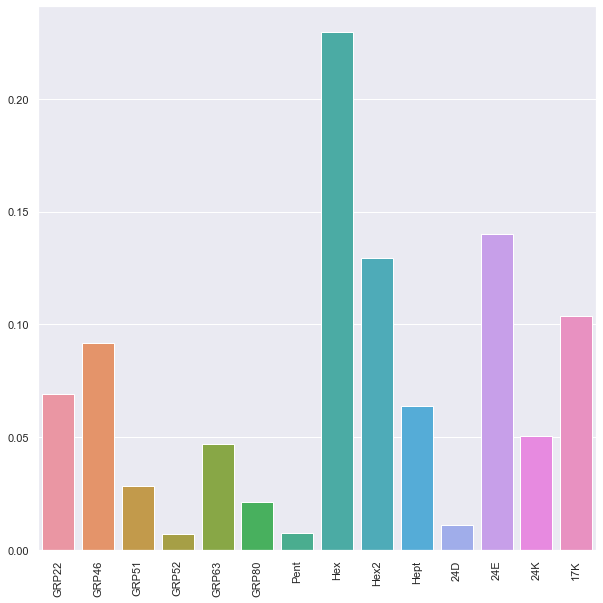

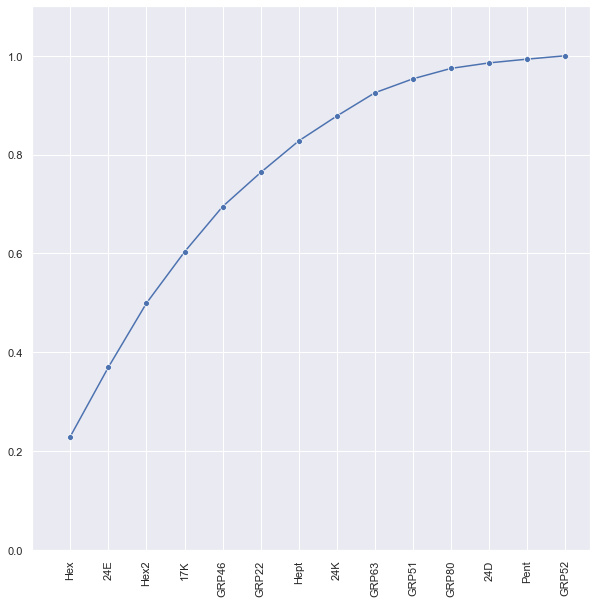

,Feature,Score
0,Hex,0.229496
1,24E,0.140240
2,Hex2,0.129578
3,17K,0.103899
4,GRP46,0.091651
5,GRP22,0.068972
6,Hept,0.063922
7,24K,0.050369
8,GRP63,0.047071
9,GRP51,0.028207


In [66]:
from sklearn.feature_selection import f_classif
ml.calc_feature_importances_kbest(x_train=ml.x, y_train=ml.y, features=ml.features, method_classif=f_classif)

- Run PCA to determine the number of components to use in all following cross-validation splits

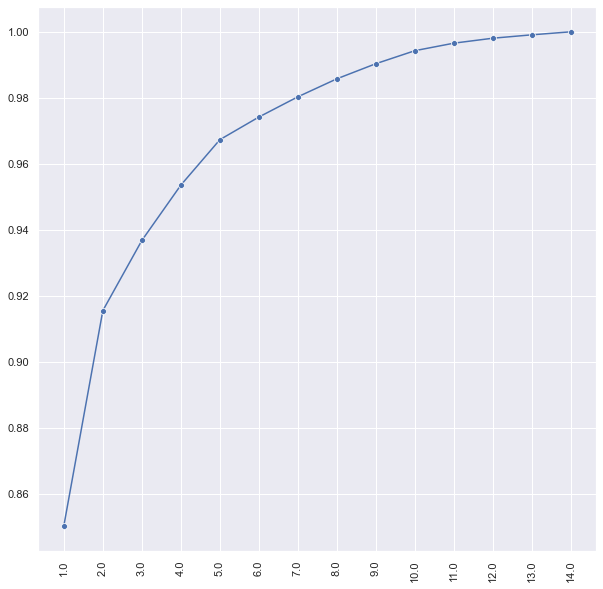

In [67]:
all_features_pca = ml.run_pca(x_train=ml.x, features=ml.features)

Contributions of the 14 barrels to each principal component (see the Scree plot above for how much of the signal in the data is explained by successive principal components)

In [68]:
pca_components = OrderedDict({'Component': [int(n) for n in range(1, 15)]})
for index, feature in enumerate(ml.features):
    pca_components[feature] = all_features_pca.components_[:,index]
pca_components = pd.DataFrame(pca_components)
pca_components = pca_components.set_index('Component', drop=True)

In [69]:
pca_components

,GRP22,GRP46,GRP51,GRP52,GRP63,GRP80,Pent,Hex,Hex2,Hept,24D,24E,24K,17K
Component,,,,,,,,,,,,,,
1,-0.266902,0.568333,-0.088415,-0.007781,0.011900,0.032766,-0.049510,-0.481917,-0.345679,-0.341176,-0.031879,0.038346,-0.127505,0.327618
2,-0.070971,0.507391,-0.078129,-0.083570,-0.060667,-0.072708,-0.015433,0.274901,0.084042,-0.171565,-0.142329,-0.144221,-0.212151,-0.719090
3,-0.095383,0.194535,-0.020337,-0.107616,-0.071513,-0.096403,-0.054327,0.654539,0.195234,-0.108228,-0.226674,-0.177433,-0.113949,0.591274
4,0.437350,0.531511,0.170737,0.025132,0.087539,0.260935,0.116534,0.139108,-0.181498,0.533274,0.218160,0.054056,0.105533,0.093708
5,-0.022539,0.200409,0.048422,0.122687,-0.077048,0.199609,-0.017086,-0.348903,0.854057,0.120704,-0.046310,0.070737,-0.128072,0.081197
6,0.045632,-0.174963,0.133015,0.015009,-0.180336,0.552630,0.530705,-0.051209,-0.130108,-0.102710,-0.232233,-0.407974,-0.281645,0.004398
7,-0.617419,0.032745,-0.115044,-0.317456,-0.052053,0.045190,0.088213,-0.065493,-0.047520,0.560803,-0.260824,-0.108149,0.296924,-0.047313
8,0.341249,-0.081955,-0.026107,-0.204544,-0.198528,-0.236598,-0.443963,-0.258492,-0.121064,0.319599,-0.296083,-0.302695,-0.421116,0.039633
9,0.295607,0.054157,-0.038614,-0.295957,-0.071319,0.273891,-0.287067,-0.087790,0.089966,-0.314024,-0.142991,-0.297047,0.659155,-0.022602


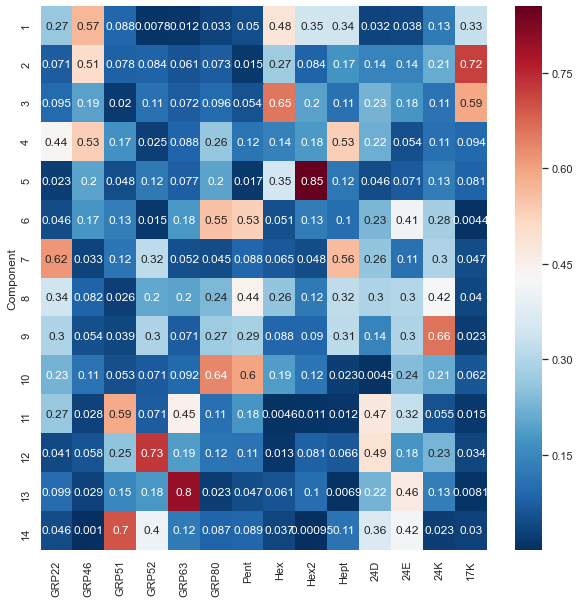

In [70]:
sns.heatmap(data=pca_components.abs(), cmap='RdBu_r', annot=True, xticklabels=True, yticklabels=True)

Relative contribution to the different components of each barrel

In [71]:
col_sums = copy.deepcopy(pca_components).abs().sum(axis=0)
relative_pca_components = copy.deepcopy(pca_components.abs()).div(col_sums, axis=1)

In [72]:
relative_pca_components

,GRP22,GRP46,GRP51,GRP52,GRP63,GRP80,Pent,Hex,Hex2,Hept,24D,24E,24K,17K
Component,,,,,,,,,,,,,,
1,0.092912,0.220706,0.035953,0.002956,0.004831,0.011959,0.018854,0.180661,0.146350,0.122214,0.010106,0.011908,0.042521,0.157727
2,0.024706,0.197040,0.031770,0.031751,0.024628,0.026537,0.005877,0.103055,0.035581,0.061457,0.045121,0.044788,0.070749,0.346195
3,0.033204,0.075546,0.008270,0.040887,0.029031,0.035185,0.020689,0.245374,0.082656,0.038769,0.071860,0.055102,0.038000,0.284660
4,0.152247,0.206407,0.069428,0.009548,0.035537,0.095237,0.044378,0.052149,0.076840,0.191026,0.069161,0.016787,0.035193,0.045115
5,0.007846,0.077827,0.019690,0.046613,0.031278,0.072854,0.006507,0.130797,0.361581,0.043238,0.014681,0.021967,0.042710,0.039091
6,0.015885,0.067945,0.054089,0.005703,0.073208,0.201701,0.202102,0.019197,0.055084,0.036792,0.073623,0.126696,0.093924,0.002117
7,0.214931,0.012716,0.046781,0.120611,0.021131,0.016494,0.033593,0.024552,0.020118,0.200888,0.082687,0.033586,0.099019,0.022778
8,0.118793,0.031826,0.010616,0.077712,0.080593,0.086354,0.169069,0.096904,0.051255,0.114485,0.093865,0.094002,0.140435,0.019081
9,0.102904,0.021031,0.015702,0.112443,0.028952,0.099966,0.109320,0.032911,0.038089,0.112488,0.045331,0.092248,0.219817,0.010881


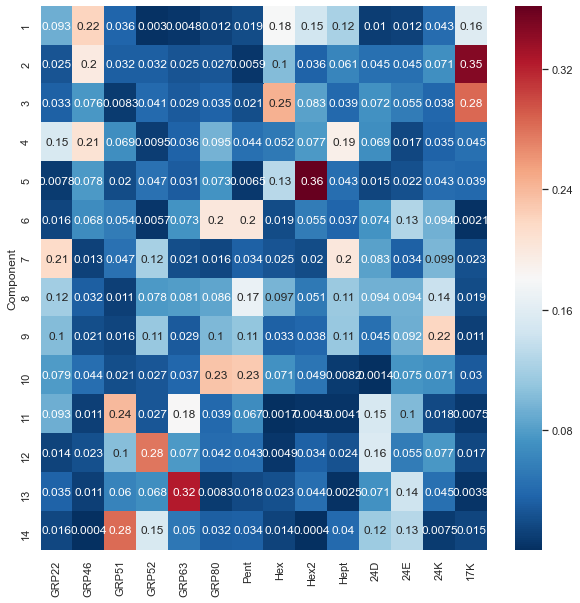

In [73]:
sns.heatmap(data=relative_pca_components.abs(), cmap='RdBu_r', annot=True, xticklabels=True, yticklabels=True)

Scatter plots of data transformed to PCA dimensions

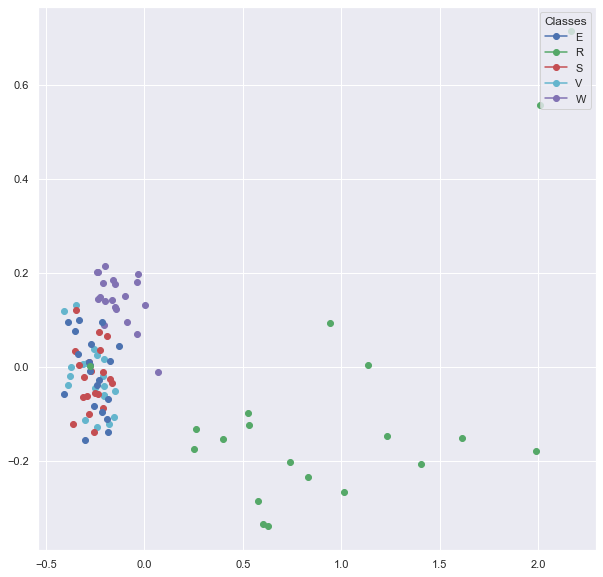

In [74]:
# Runs PCA and transforms data to 2 dimensions 
from sklearn.decomposition import PCA
pca_2d = PCA(n_components=2)
pca_fitted_2d = pca_2d.fit(X=ml.x)
X_reduced_2d = pca_fitted_2d.transform(X=ml.x)

# Plots transformed data on 3D scatter plot
x_train_pca_2d = plot_scatter(
    x_data=X_reduced_2d, y_data=ml.y, dimensions=2, categories=['E', 'R', 'S', 'V', 'W'],
    results_dir=ml.results_dir, plot_id='All_data_2D'
)

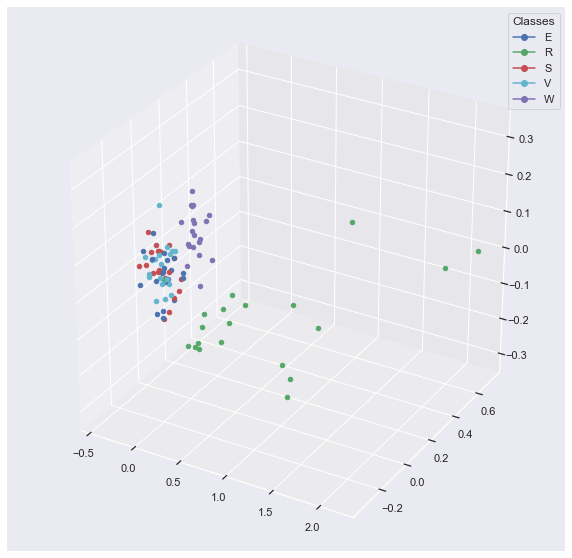

In [75]:
# Runs PCA and transforms data to 3 dimensions 
from sklearn.decomposition import PCA
pca = PCA(n_components=3)
pca_fitted = pca.fit(X=ml.x)
X_reduced = pca_fitted.transform(X=ml.x)

# Plots transformed data on 3D scatter plot
x_train_pca = plot_scatter(
    x_data=X_reduced, y_data=ml.y, dimensions=3, categories=['E', 'R', 'S', 'V', 'W'],
    results_dir=ml.results_dir, plot_id='All_data_3D'
)

~98% of the variation in the data can be accounted for with 7 features. Since there are only 14 features, in this case I won't use PCA to reduce the number of features. However, I will still run PCA in order to transform the 14 features so that they are independent of each other.

In [76]:
n_components = 14

Runs randomized search to spot check 5 different ML algorithms with 25 different combinations of the parameters to be optimised. Cross-validation loop involves:
- standardisation of the data (i.e. subtraction of the mean and division by the standard deviation) for each feature
- transformation to  orthogonal dimensions using PCA
- randomized search of 25 different hyperparameter combinations for the selected ML algorithm

In [78]:
cv_folds = 5  # Number of splits in cross-validation
n_iter = 25  # Number of parameter combinations to test in RandomisedSearchCV

resampling_methods = ['no_balancing']

score_dict = OrderedDict({'Algorithm': [],
                          'Resampling_method': [],
                          'Best_params': [],
                          'Best_accuracy_score': [],
                          'Mean_accuracy_score': [],
                          'Std_dev_accuracy_score': []})

log_reg = LogisticRegression(n_jobs=-1)
knn = KNeighborsClassifier(metric='minkowski', n_jobs=-1)
linear_svc = LinearSVC(dual=False)
svc = SVC()
naive_bayes = GaussianNB()

algorithms = [log_reg, knn, naive_bayes, linear_svc, svc]
for algorithm in algorithms:
    params = ml.define_tuned_model_params(clf=algorithm, x_train=ml.train_x)
    spot_checks, *_ = ml.run_algorithm(
        clf=algorithm, x_train=ml.train_x, y_train=ml.train_y, train_groups=ml.train_groups, x_test=ml.test_x,
        y_test=ml.test_y, n_components_pca=n_components, run='randomsearch', params=params,
        train_scoring_func='accuracy', test_scoring_funcs=None, resampling_method=resampling_methods,
        n_iter=n_iter, cv_folds=cv_folds
    )

    for method, spot_check in spot_checks.items():
        score_dict['Algorithm'].append(type(algorithm).__name__)
        score_dict['Resampling_method'].append(method)
        score_dict['Best_params'].append(spot_check.best_params_)
        score_dict['Best_accuracy_score'].append(spot_check.best_score_)
        score_dict['Mean_accuracy_score'].append(np.nanmean(spot_check.cv_results_['mean_test_score']))
        score_dict['Std_dev_accuracy_score'].append(np.nanmean(spot_check.cv_results_['std_test_score']))

        print('\n\n\n\n\n')
        print('{}: {}'.format(type(algorithm).__name__, method))
        print('Best parameters: {}'.format(spot_check.best_params_))
        print('Best score: {}'.format(spot_check.best_score_))

        selected_params = spot_check.cv_results_['params']
        selected_params_score = spot_check.cv_results_['mean_test_score']
        print('All parameter combinations tested:')
        for i in range(len(selected_params)):
            print(i+1, selected_params[i], round(selected_params_score[i], 3))
        
score_df = pd.DataFrame(score_dict)

Randomised search with cross-validation results:
Best parameters: {'LogisticRegression__solver': 'saga', 'LogisticRegression__penalty': 'l2', 'LogisticRegression__multi_class': 'ovr', 'LogisticRegression__C': 0.0031622776601683794}
Best score: 0.525






LogisticRegression: no_balancing
Best parameters: {'LogisticRegression__solver': 'saga', 'LogisticRegression__penalty': 'l2', 'LogisticRegression__multi_class': 'ovr', 'LogisticRegression__C': 0.0031622776601683794}
Best score: 0.525
All parameter combinations tested:
1 {'LogisticRegression__solver': 'newton-cg', 'LogisticRegression__penalty': 'l1', 'LogisticRegression__multi_class': 'ovr', 'LogisticRegression__C': 0.0031622776601683794} nan
2 {'LogisticRegression__solver': 'liblinear', 'LogisticRegression__penalty': 'l1', 'LogisticRegression__multi_class': 'ovr', 'LogisticRegression__C': 10000.0} 0.5
3 {'LogisticRegression__solver': 'lbfgs', 'LogisticRegression__penalty': 'l2', 'LogisticRegression__multi_class': 'multinomial', 'Logis

Randomised search with cross-validation results:
Best parameters: {'LinearSVC__C': 64.0}
Best score: 0.55






LinearSVC: no_balancing
Best parameters: {'LinearSVC__C': 64.0}
Best score: 0.55
All parameter combinations tested:
1 {'LinearSVC__C': 64.0} 0.55
2 {'LinearSVC__C': 2896.309375740099} 0.55
3 {'LinearSVC__C': 5.656854249492381} 0.55
4 {'LinearSVC__C': 1.4142135623730951} 0.538
5 {'LinearSVC__C': 0.04419417382415922} 0.512
6 {'LinearSVC__C': 256.0} 0.55
7 {'LinearSVC__C': 1448.1546878700494} 0.55
8 {'LinearSVC__C': 362.03867196751236} 0.55
9 {'LinearSVC__C': 90.50966799187809} 0.55
10 {'LinearSVC__C': 4096.0} 0.55
11 {'LinearSVC__C': 45.254833995939045} 0.55
12 {'LinearSVC__C': 512.0} 0.55
13 {'LinearSVC__C': 2.0} 0.55
14 {'LinearSVC__C': 128.0} 0.55
15 {'LinearSVC__C': 0.03125} 0.512
16 {'LinearSVC__C': 2.8284271247461903} 0.55
17 {'LinearSVC__C': 2048.0} 0.55
18 {'LinearSVC__C': 1024.0} 0.55
19 {'LinearSVC__C': 0.3535533905932738} 0.488
20 {'LinearSVC__C': 22.627416997969522}

In [79]:
score_df

,Algorithm,Resampling_method,Best_params,Best_accuracy_score,Mean_accuracy_score,Std_dev_accuracy_score
0,LogisticRegression,no_balancing,"{'LogisticRegression__solver': 'saga', 'Logist...",0.5250,0.483333,0.084067
1,KNeighborsClassifier,no_balancing,"{'KNeighborsClassifier__weights': 'uniform', '...",0.5500,0.520500,0.089330
2,GaussianNB,no_balancing,{},0.4875,0.487500,0.072887
3,LinearSVC,no_balancing,{'LinearSVC__C': 64.0},0.5500,0.539500,0.121605
4,SVC,no_balancing,"{'SVC__gamma': 0.005524271728019903, 'SVC__C':...",0.5625,0.468500,0.096010


So, from this spot check, a **support vector classifier with radial basis function kernel** does a good job.

So, run hyperparameter optimisation for SVC.

In [80]:
fixed_params = ml.define_fixed_model_params(clf=SVC())
random_tuned_params = ml.define_tuned_model_params(clf=SVC(), x_train=ml.train_x)

svc_random_search = ml.run_ml(
    clf=SVC, x_train=ml.train_x, y_train=ml.train_y, train_groups=None, x_test=ml.test_x,
    y_test=ml.test_y, n_components_pca=n_components, run='random search', fixed_params=fixed_params,
    tuned_params=random_tuned_params, train_scoring_func='accuracy', test_scoring_funcs=None,
    resampling_method=['no_balancing'], n_iter='', cv_folds=cv_folds
)

Randomised search with cross-validation results:
Best parameters: {'SVC__gamma': 0.125, 'SVC__C': 181.01933598375618}
Best score: 0.5625


In [81]:
grid_tuned_params = {'C': np.linspace(10, 1000, 100),
                     'gamma': np.linspace(0.01, 1, 100)}

svc_grid_search = ml.run_ml(
    clf=SVC, x_train=ml.train_x, y_train=ml.train_y, train_groups=None, x_test=ml.test_x,
    y_test=ml.test_y, n_components_pca=n_components, run='grid search', fixed_params=fixed_params,
    tuned_params=grid_tuned_params, train_scoring_func='accuracy', test_scoring_funcs=None,
    resampling_method=['no_balancing'], n_iter='', cv_folds=cv_folds
)

Grid search with cross-validation results:
Best parameters: {'SVC__C': 280.0, 'SVC__gamma': 0.02}
Best score: 0.525


Best score obtained with grid search is slightly worse than that obtained from random search, but that can be explained by the fact that the scores obatined will vary based upon how the data is divided at random into training and test sets during cross-validation.

### So, optimal hyperparameter combination:
- C = 280
- gamma = 0.02

Model cross-validation score: [0.4375 0.5    0.5625 0.4375 0.5   ]
accuracy_score: 0.55
recall_score: 0.55
precision_score: 0.5833333333333334
f1_score: 0.5566666666666666
cohen_kappa_score: 0.4375
None


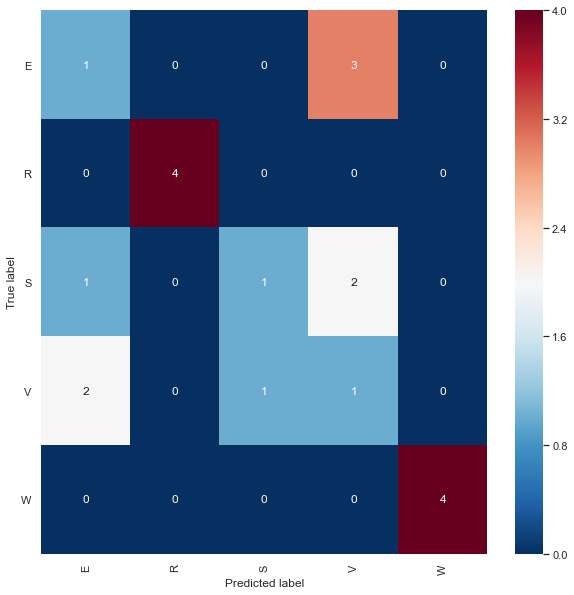

true


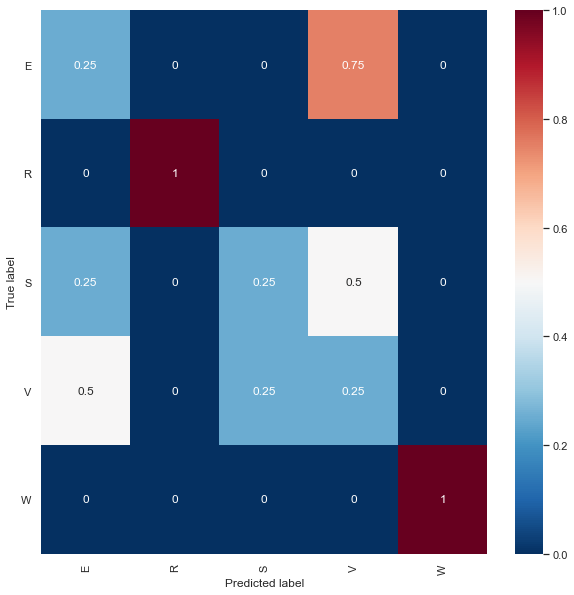

pred


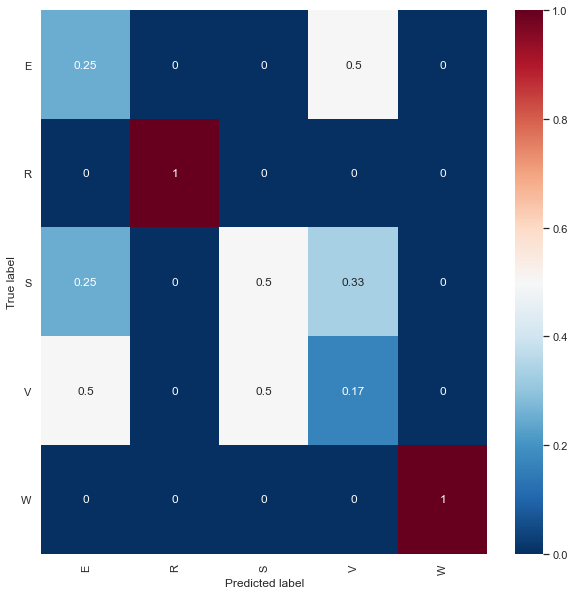

In [82]:
final_params = {'C': 280,
                'gamma': 0.02}

scoring_funcs={accuracy_score: {},
               recall_score: {'average': 'macro'},
               precision_score: {'average': 'macro'},
               f1_score: {'average': 'macro'},
               cohen_kappa_score: {}}

svc_clf, train_scores, test_scores, predictions = ml.run_ml(
    clf=SVC, x_train=ml.train_x, y_train=ml.train_y, train_groups=None, x_test=ml.test_x,
    y_test=ml.test_y, n_components_pca=n_components, run='train', fixed_params=fixed_params,
    tuned_params=final_params, train_scoring_func='accuracy', test_scoring_funcs=scoring_funcs,
    resampling_method=['no_balancing'], n_iter='', cv_folds=cv_folds
)

How well does the trained classifier predict the different classes?

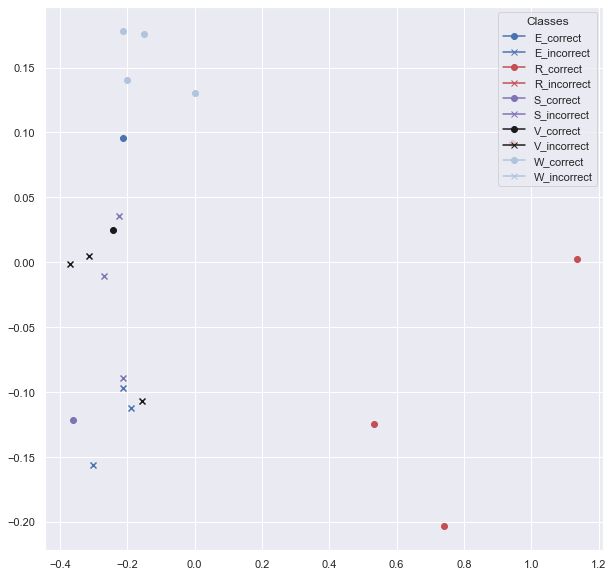

In [85]:
X_test_reduced = pca_fitted.transform(X=ml.test_x)
y_test_pred_hue = []
for index, y in np.ndenumerate(ml.test_y):
    if predictions[index] == y:
        y_test_pred_hue.append('{}_correct'.format(y))
    else:
        y_test_pred_hue.append('{}_incorrect'.format(y))

# Plots transformed data on 3D scatter plot
x_train_pca = plot_scatter(
    x_data=X_test_reduced, y_data=y_test_pred_hue, dimensions=2,
    categories=['E_correct', 'E_incorrect', 'R_correct', 'R_incorrect', 'S_correct', 'S_incorrect', 'V_correct',
                'V_incorrect', 'W_correct', 'W_incorrect'],
    results_dir=ml.results_dir, plot_id='Test_data'
)